In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Dropout,LSTM, Bidirectional
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import torch
from torch.nn import Transformer
from sklearn.preprocessing import StandardScaler #good
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn import metrics #accuracy measure
import joblib
import warnings

In [2]:
def second_turn(label,dif):
    if label>0:
        return 0
    if label==0:
        return dif
def fturn(df):
    if list(df['label'])[0]>0: 
        after0=1
    else: after0=1
    return after0
def fturn_test():
    if list(df['label'])[0]>0: 
        after0=1
    else: after0=1
    return after0

In [3]:
training_set=os.listdir("./training_set_df_acc_windowsize3_with_pre_feat3s_gan/")
# training_set=['./gan_win6.csv','./gan_win6.csv']
df=None
for data in training_set:
    if data.endswith('.csv'):
        file=f"./training_set_df_acc_windowsize3_with_pre_feat3s_gan/{data}"
        if df is None:
            df=pd.read_csv(file)
            df=df.astype(float)
            print(df.shape)
            df['previous_label']=df['label']
            
            df['label']=df['label'].astype("category")
            df['previous_label']=df['label']
            df['previous_label']=df['previous_label'].astype(int)
            df['second_turn']=df['previous_label'].diff()
            df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['second_turn']),axis=1)
            turn=list(df['second_turn'])
            turn_2=[]
            
            if (df['label'][0].item()>0): 
                count=2
            else: 
                count=1
            for i in range(len(turn)):

                if turn[i]<-3:
                    count-=1
                if count<=0:
                    turn_2.append(1) 
                else:
                    turn_2.append(0) 
            df['turn']=turn
            df['second_turn']=turn_2
            after1=[]
            
# print(list(df['label'])[0])

            after0=fturn(df)
            sturn=True
            for i in range(len(df.label)):

                if (list(df['label'])[i]==1)|(list(df['label'])[i]==2)|(list(df['label'])[i]==3):
                    after0-=1
                if (list(df['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(df)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after1.append(1) 
                else:
                    after1.append(0) 
            df['after1']=after1
            after4=[]
            after0=fturn(df)
            sturn=True
            for i in range(len(df['label'])):
                if (list(df['label'])[i]==4)|(list(df['label'])[i]==5)|(list(df['label'])[i]==6):
                    after0-=1
                if (list(df['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(df)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after4.append(1) 
                else:
                    after4.append(0) 

            df['after4']=after4
            df=df.reset_index().rename(columns={df.index.name:'time'})
        else:
            d=pd.read_csv(file)
            d['previous_label']=d['label']
            d['previous_label']=d['previous_label'].astype(int)
            d['label']=d['label'].astype("category")
            d['second_turn']=d['previous_label'].diff()
            d['second_turn']=d.apply(lambda d:second_turn(d['label'],d['second_turn']),axis=1)
            turn=list(d['second_turn'])
            turn_2=[]
            if (d['label'][0].item()>0): 
                count=2
            else: count=1
            for i in range(len(turn)):
                if turn[i]<-3:
                    count-=1
                if count<=0:
                    turn_2.append(1) 
                else:
                    turn_2.append(0) 
            d['second_turn']=turn_2
            d['turn']=turn
            after1=[]
            
# print(list(df['label'])[0])

            after0=fturn(d)
            sturn=True
            for i in range(len(d.label)):

                if (list(d['label'])[i]==1)|(list(d['label'])[i]==2)|(list(d['label'])[i]==3):
                    after0-=1
                if (list(d['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(d)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after1.append(1) 
                else:
                    after1.append(0) 
            d['after1']=after1
            after4=[]
            after0=fturn(d)
            sturn=True
            for i in range(len(d['label'])):
                if (list(d['label'])[i]==4)|(list(d['label'])[i]==5)|(list(d['label'])[i]==6):
                    after0-=1
                if (list(df['second_turn'])[i]>0) and sturn==True:
                    after0=fturn(d)
                    sturn=False
                if after0<=0:
            #         print(after0)
                    after4.append(1) 
                else:
                    after4.append(0) 

            d['after4']=after4
            d=d.reset_index().rename(columns={d.index.name:'time'})
            df=pd.concat([df,d])
# # turn2
# df['previous_label']=df['label']
# df['second_turn']=df['previous_label'].diff()
# df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['second_turn']),axis=1)
# turn=list(df['second_turn'])
# turn_2=[]

# if (df['label'][0].item()>0): 
#     count=2
# else: 
#     count=1
# for i in range(len(turn)):

#     if turn[i]<-3:
#         count-=1
#     if count<=0:
#         turn_2.append(1) 
#     else:
#         turn_2.append(0) 
# df['turn']=turn
# df['second_turn']=turn_2

# # add gan/sdv
# gan=pd.read_csv('./SDV_gen_1k.csv')
# df=pd.concat([df,gan])
# df=df.drop('Unnamed: 0',axis=1)



(211, 8682)


# add gan function

In [4]:
df.columns

Index(['index', 'left_elbow_shoulder_hip mean_ft',
       'left_elbow_shoulder_hip std_ft', 'left_elbow_shoulder_hip max_ft',
       'left_elbow_shoulder_hip min_ft', 'left_elbow_shoulder_hip var_ft',
       'left_elbow_shoulder_hip med_ft', 'left_elbow_shoulder_hip sum_ft',
       'left_elbow_shoulder_hip kurtosis', 'left_elbow_shoulder_hip skew',
       ...
       'movingcenter_y minerror previous 3 s',
       'movingcenter_y stderror previous 3 s',
       'movingcenter_y quantile25e previous 3 s',
       'movingcenter_y quantile75e previous 3 s', 'previous_label', 'label',
       'second_turn', 'turn', 'after1', 'after4'],
      dtype='object', length=8687)

In [5]:
for file in os.listdir('./gan_final'):
    gan=pd.read_csv(f'./gan_final/{file}')
# gan=gan.drop(['Index'],axis=1)

    df=pd.concat([df,gan])
try:
    df=df.drop('Unnamed: 0',axis=1)
except:
    pass



In [6]:
df[['label','second_turn','turn','after1']].to_csv('./check/check.csv')

In [7]:
df=df.drop(['second_turn','turn'],axis=1)

In [8]:
# df=df.astype(float)
# df['previous_label']=df['label']
# df['label']=df['label'].astype(int)
# df['label']=df['label'].astype("category")
# df['second_turn']=df['previous_label'].diff
# df['second_turn']=df.apply(lambda df:second_turn(df['label'],df['dif']))
# turn=list(df['second_turn'])

In [9]:
# is_2=False
# turn_2=[]
# for i in len(turn):
#     if turn[i]>2:
#         is_2=True
#     if !is_2:
#         return 0
#     return 1
# df['second_turn']=turn_2

In [10]:
test=pd.read_csv('./test_set_df_acc_windowsize3_with_pre_feat3s_gan/N02T1.csv')
df=df.fillna(0)

In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6649 entries, 0 to 162
Data columns (total 8685 columns):
 #     Column                                                          Dtype  
---    ------                                                          -----  
 0     index                                                           int64  
 1     left_elbow_shoulder_hip mean_ft                                 float64
 2     left_elbow_shoulder_hip std_ft                                  float64
 3     left_elbow_shoulder_hip max_ft                                  float64
 4     left_elbow_shoulder_hip min_ft                                  float64
 5     left_elbow_shoulder_hip var_ft                                  float64
 6     left_elbow_shoulder_hip med_ft                                  float64
 7     left_elbow_shoulder_hip sum_ft                                  float64
 8     left_elbow_shoulder_hip kurtosis                                float64
 9     left_elbow_shoulder_h

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='Count'>

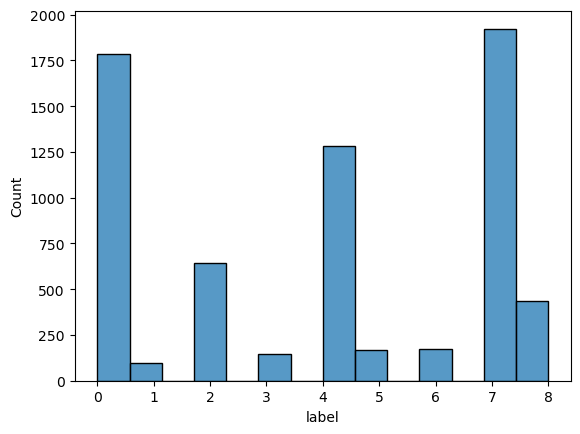

In [12]:
sns.histplot(df["label"])

In [13]:
X=df.drop(["label","previous_label",'after1','after4'],axis=1)
y=df['label']

In [14]:
X.shape

(6649, 8681)

In [15]:
y.shape

(6649,)

In [16]:
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(X_train,y_train)
# # filename = './xgb_model.sav'
# # xgbcl=joblib.load(filename)
# pred=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [17]:
# from sklearn.ensemble import RandomForestClassifier #Random Forest
# rf=RandomForestClassifier(random_state=10)
# rf.fit(X_train,y_train)
# pred=rf.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [18]:
# import joblib
# filename = './xgb_model.sav'
# joblib.dump(xgbcl, filename)

In [19]:
# from sklearn.svm import SVC
# svc=SVC()
# svc.fit(X_train,y_train)
# pred=svc.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [20]:
# from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
# knn = RadiusNeighborsClassifier(radius=175)
# knn.fit(X_train,y_train)
# pred=knn.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [21]:
# from sklearn.linear_model import SGDClassifier
## sgd=SGDClassifier()loss='epsilon_insensitive'
# sgd.fit(X_train,y_train)
# pred=sgd.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [22]:
# from sklearn.feature_selection import SelectKBest,f_regression
# # Applying SelectKBest class to extract top 15 best features
# fs = SelectKBest(score_func=f_regression,k=15)
# # Applying feature selection
# fit = fs.fit(X,y)
# features_score = pd.DataFrame(fit.scores_)
# features = pd.DataFrame(X.columns)
# feature_score = pd.concat([features,features_score],axis=1)
# # Assigning column names
# feature_score.columns = ["Input_Features","F_Score"]
# print(feature_score.nlargest(300,columns="F_Score"))
# # dfi.export(feature_score.nlargest(16,columns="F_Score"),'./image/fulltest/f_test.png')
# # feature_score.nlargest(300,columns="F_Score")['Input_Features'].values

In [23]:
X_train=X#[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_train=y
test=test.reset_index().rename(columns={test.index.name:'time'})
X_test=test.drop(["label","previous_label"],axis=1)
# X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_test=test['label']


In [24]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier #Random Forest
# try:
# oversampling the train dataset using SMOTE

sm = SMOTE()
all_feature_smote, all_label_smote = sm.fit_resample(X_train,y_train)
# rf=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf.fit(all_feature_smote, all_label_smote)
# # filename = './model/smote_rf_model.sav'
# # rf=joblib.load(filename)
# pred_rf=rf.predict(X_test)

# print(metrics.classification_report(pred_rf,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf,y_test, normalize='true')
# sns.heatmap(conf,annot=True)



In [25]:
# filename = './model/smote_rf_model2.sav'
# joblib.dump(rf, filename)

In [26]:
a=[e for e in X_train if e not in X_test]
a

[]

/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/khangphan/anaconda3/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or

              precision    recall  f1-score   support

           0       0.86      0.72      0.79        58
           1       0.00      0.00      0.00         1
           2       0.33      1.00      0.50         3
           3       0.00      0.00      0.00         0
           4       0.74      0.70      0.72        33
           5       0.50      1.00      0.67         1
           6       0.75      1.00      0.86         3
           7       0.91      0.93      0.92        45
           8       0.93      1.00      0.97        14

    accuracy                           0.81       158
   macro avg       0.56      0.71      0.60       158
weighted avg       0.84      0.81      0.82       158



/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

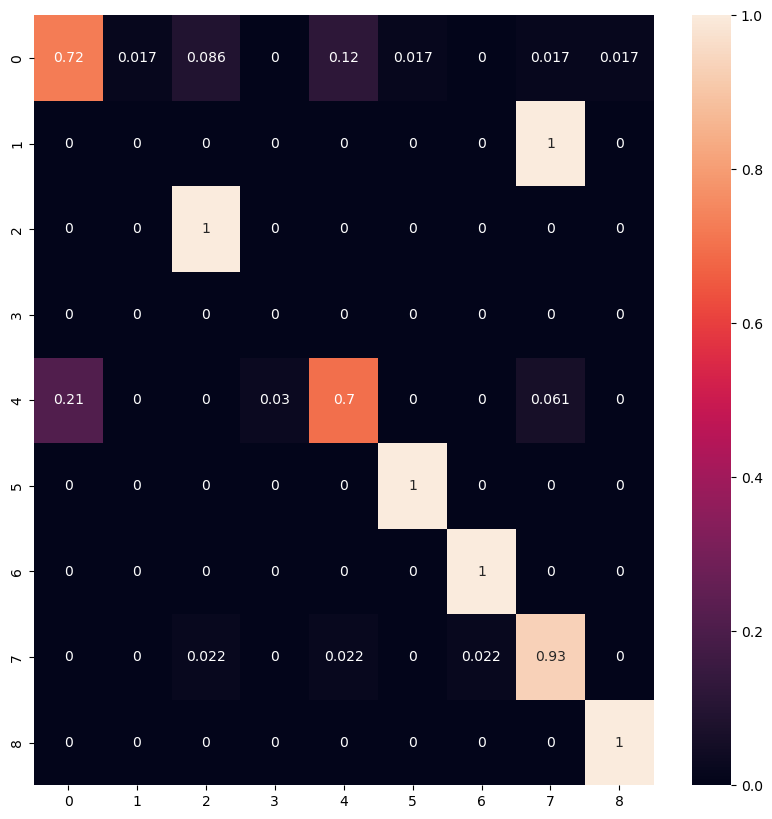

In [27]:
from xgboost import XGBClassifier#XGBcalssifier
from xgboost import callback
early_stop = callback.EarlyStopping(
    rounds=4, metric_name='mlogloss', save_best=True
)
try:
    filename = './model_windowsize3_with_pre_feat3s_gan/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    pred_xgb=xgbcl.predict(X_test)
except:
    xgbcl=XGBClassifier( eval_metric='mlogloss', random_state=10,n_estimators=84)#,callbacks=[early_stop])
    xgbcl.fit(all_feature_smote, all_label_smote)#,eval_set=[(X_test, y_test)])
    pred_xgb=xgbcl.predict(X_test)

from sklearn import metrics #accuracy measure
print(metrics.classification_report(pred_xgb,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_xgb,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [28]:
# X_train_with_predictions.shape

In [29]:
# X_train_with_predictions=df.drop(["label"],axis=1)
# y_train_with_predictions=df['label']
# X_test["previous_label"]=pred_xgb
# all_feature_smote_with_predictions, all_label_smote_with_predictions = sm.fit_resample(X_train_with_predictions,y_train_with_predictions)
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='aucs‌', random_state=10)
# xgbcl.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_xgb_with_predictions=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_xgb_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_xgb_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [30]:
# rf_with_predictions=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf_with_predictions.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_rf_with_predictions=rf_with_predictions.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_rf_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [31]:
filename = './model_windowsize3_with_pre_feat3s_gan/smote_xgb_model2.sav'
joblib.dump(xgbcl, filename)

['./model_windowsize3_with_pre_feat3s_gan/smote_xgb_model2.sav']

In [32]:
# from sklearn.ensemble import HistGradientBoostingClassifier
# HGBC=HistGradientBoostingClassifier(random_state=10,class_weight='balanced')
# # HGBC.fit(X_train,y_train)
# try:
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_HGBC_model2.sav'
#     HGBC=joblib.load(filename)
#     pred=HGBC.predict(X_test)
# except:
#     HGBC.fit(all_feature_smote, all_label_smote )
#     pred=HGBC.predict(X_test)


# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [33]:
# filename = './model_windowsize3_with_pre_feat3s_gan/smote_HGBC_model2.sav'
# joblib.dump(HGBC, filename)

In [34]:
# def predict0_4(df):
# #     print(df['label_pred'])
# #     print(df['label_pred'] in [1,2,3,5,6,7,8])
#     if df['previous_label'] in [1,2,3,5,6,7,8]:
#         return df['previous_label']
#     else:
# #         print(np.array(df.drop(["label","previous_label",'label_pred'])))
# # xgb_class0_4
#         return xgbcl.predict(np.array(df.drop(["label",'previous_label'
#                                     ])).reshape(1,-1)).view().item()

In [35]:
# from sklearn.ensemble import AdaBoostClassifier
# test['previous_label']=pred_xgb
# # test['previous_label']=list(pred_xgb).insert(0,0)
# df_class0_4=df[df['label'].isin([0,4])]
# X_train_class0_4=df_class0_4.drop(["label",'previous_label'],axis=1)
# y_train_class0_4=df_class0_4.label
# X_train_class0_4=np.array(X_train_class0_4)
# y_train_class0_4=np.array(y_train_class0_4)
# X_train_class0_4sm,y_train_class0_4sm = sm.fit_resample(X_train_class0_4,y_train_class0_4)
# xgb_class0_4=RandomForestClassifier(random_state=10,n_estimators=30,criterion='gini')#XGBClassifier( eval_metric='logloss', random_state=10)
# try:
#     print('sm')
# #     xgb_class0_4.fit(X_train_class0_4sm, y_train_class0_4sm)
# except:
#     print('no sm')
# #     xgb_class0_4.fit(X_train_class0_4, y_train_class0_4)
# test['label_pred']=test.apply(lambda x:predict0_4(x),axis=1)

# # test_class0_4=test[(test['label_pred'].isin([0,4]))&(test['label'].isin([0,4]))]
# # X_test_class0_4=test_class0_4.drop(["label","previous_label",'label_pred'],axis=1)
# # y_test_class0_4=test_class0_4.label
# # # X_test_class0_4=np.array(X_test_class0_4)
# # # y_test_class0_4=np.array(y_test_class0_4)

# # pred_class0_4=xgb_class0_4.predict(X_test_class0_4)
# print(metrics.classification_report(test['label'],test['label_pred']))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(test['label'],test['label_pred'], normalize='true')
# sns.heatmap(conf,annot=True)

In [36]:
pred=pred_xgb
test['label1']=pred
# turn2
test['previous_label']=test['label1']
test['second_turn']=test['previous_label'].diff()
test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
turn=list(test['second_turn'])
turn_2=[]

if (test['label1'][0].item()>0): 
    count=2
else: 
    count=1
for i in range(len(turn)):

    if turn[i]<-3:
        count-=1
    if count<=0:
        turn_2.append(1) 
    else:
        turn_2.append(0) 
test['turn']=turn
test['second_turn']=turn_2
            
print(list(test['label1'])[0])
def fturn_test():
    if list(test['label1'])[0]>0: 
        after0=1
    else: after0=1
    return after0
after0=fturn_test()
sturn=True
after1=[]
after4=[]
for i in range(len(test['label1'])):

    if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
        after0-=1
    if (list(test['second_turn'])[i]>0) and sturn==True:
        after0=fturn_test()
        sturn=False
    if after0<=0:
#         print(after0)
        after1.append(1) 
    else:
        after1.append(0) 
after0=fturn_test()
sturn=True
for i in range(len(test['label1'])):
    if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
        after0-=1
    if (list(test['second_turn'])[i]>0) and sturn==True:
        after0=fturn_test()
        sturn=False
    if after0<=0:
#         print(after0)
        after4.append(1) 
    else:
        after4.append(0) 


test['after1']=after1
test['after4']=after4
test=test.drop(['second_turn','turn'],axis=1)

8


In [37]:
X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
# X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_test_a=test['label']

X=df.drop(["label","previous_label"],axis=1)
y=df['label']
X_train_a=X#[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_train_a=y

all_feature_smote_a, all_label_smote_a =  sm.fit_resample(X_train_a,y_train_a)

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        62
         1.0       0.00      0.00      0.00         0
         2.0       0.11      1.00      0.20         1
         3.0       0.00      0.00      0.00         0
         4.0       0.97      0.86      0.91        35
         5.0       0.00      0.00      0.00         0
         6.0       0.50      1.00      0.67         2
         7.0       0.85      0.91      0.88        43
         8.0       0.93      0.93      0.93        15

    accuracy                           0.85       158
   macro avg       0.48      0.61      0.50       158
weighted avg       0.93      0.85      0.88       158



/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khangphan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

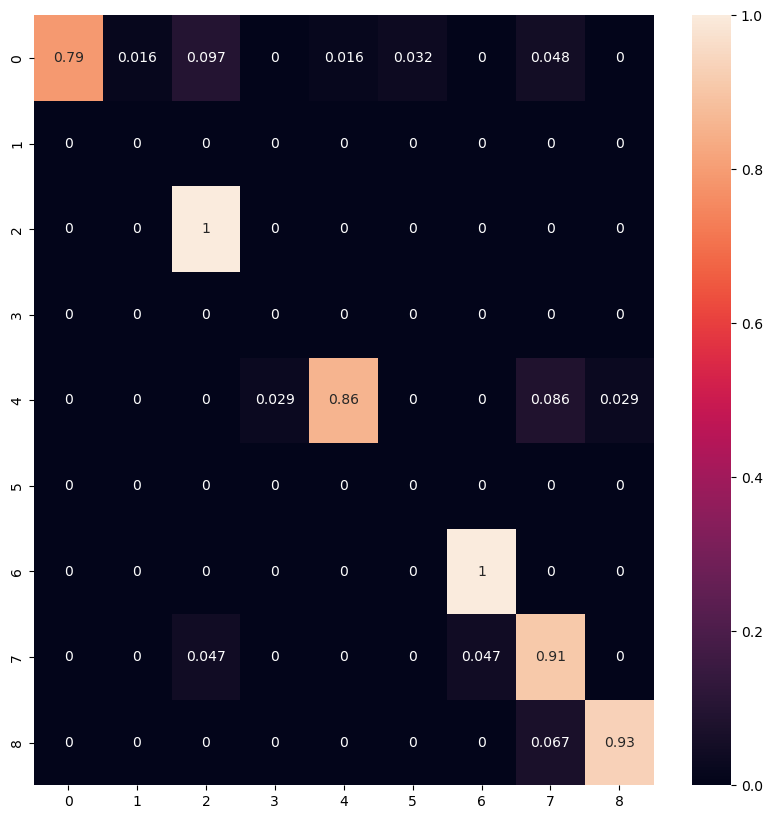

In [38]:
from sklearn.ensemble import HistGradientBoostingClassifier
try:
    filename = './model_windowsize3_with_pre_feat3s_gan/smote_HGBC_model_after.sav'
    HGBC=joblib.load(filename)
    pred_a=HGBC.predict(X_test_a)
except:
    print('learning')
    HGBC=HistGradientBoostingClassifier(random_state=10,class_weight='balanced')
    HGBC.fit(all_feature_smote_a, all_label_smote_a )
    pred_a=HGBC.predict(X_test_a)


print(metrics.classification_report(pred_a,y_test))
ax,fig=plt.subplots(figsize=(10,10))
conf=metrics.confusion_matrix(pred_a,y_test, normalize='true')
sns.heatmap(conf,annot=True)

In [39]:
# XGB=RandomForestClassifier(random_state=10)
# XGB.fit(all_feature_smote_a, all_label_smote_a)

# pred_b=XGB.predict(X_test_a)

# print(metrics.classification_report(pred_b,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_b,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [40]:
filename = './model_windowsize3_with_pre_feat3s_gan/smote_HGBC_model_after.sav'
joblib.dump(HGBC, filename)

['./model_windowsize3_with_pre_feat3s_gan/smote_HGBC_model_after.sav']

In [41]:
# # import six
# # import sys
# # sys.modules['sklearn.externals.six'] = six
# # from seqlearn.perceptron import StructuredPerceptron

# try:
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_xgb_model_after.sav'
#     xgbafter=joblib.load(filename)
#     pred_a=xgbafter.predict(X_test_a)
# except:
#     print('learning')
#     xgbafter=XGBClassifier( eval_metric='mlogloss', random_state=10)
#     xgbafter.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=xgbafter.predict(X_test_a)
    
# print(metrics.classification_report(pred_a,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_a,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [42]:
# filename = './model_windowsize3_with_pre_feat3s_gan/smote_xgb_model_after.sav'
# joblib.dump(xgbafter, filename)

In [43]:
# from sklearn.ensemble import GradientBoostingClassifier
# # import six
# # import sys
# # sys.modules['sklearn.externals.six'] = six
# # from seqlearn.perceptron import StructuredPerceptron

# try:
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_ada_model_after.sav'
#     ada=joblib.load(filename)
#     pred_a=ada.predict(X_test_a)
# except:
    
#     print('learning')
#     ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     ada.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=ada.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [44]:
# filename = './model_windowsize3_with_pre_feat3s_gan/smote_ada_model_after.sav'
# joblib.dump(ada, filename)

In [45]:
# from sklearn.model_selection import GridSearchCV
# filename = './model_windowsize3_with_pre_feat3s_gan/smote_grid_model_after.sav'
# try:
#     clf=joblib.load(filename)
#     pred_a=clf.predict(X_test_a)  
# except:

#     parameters = {
#         "loss":[ 'log_loss'],
#         "learning_rate": [ 0.1, 0.5, 0.2,0.05,0.01],#0.01, 0.025, 0.05, 0.075,
# #         "min_samples_split": np.linspace(0.1, 0.5, 12),
# #         "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#         "max_depth":[8,50],
#         "max_features":["log2","sqrt"],
#         "criterion": ["friedman_mse",  'squared_error']
# #         "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
# #         "n_estimators":[10]
#         }
#     clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=-1)
#     print('learning')
#     # ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     clf.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=clf.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [46]:
# filename = './model_windowsize3_with_pre_feat3s_gan/smote_grid_model_after.sav'
# joblib.dump(ada, filename)

In [47]:
# from sklearn.ensemble import VotingClassifier,StackingClassifier,BaggingClassifier,RandomTreesEmbedding,ExtraTreesClassifier,RandomForestClassifier
# VC=VotingClassifier(estimators=[('HGBC',HGBC),
#                                  ('XGB',xgbafter),
#                                ('RTE',ExtraTreesClassifier()),
#                                ('RF',RandomForestClassifier()),
#                                ('BG',BaggingClassifier())],
#                     weights=[7,7,5,5,5],
#                     voting='soft'
#                    )
# filename = './model_windowsize3_with_pre_feat3s_gan/smote_VC2_model_after.sav'
# try:
#     VC=joblib.load(filename)
#     pred_a=VC.predict(X_test_a)  
# except:

#     print('learning')
#     # ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     VC.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=VC.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [48]:
# filename = './model_windowsize3_with_pre_feat3s_gan/smote_VC2_model_after.sav'
# joblib.dump(VC, filename)

In [49]:
# from sklearn.ensemble import VotingClassifier,StackingClassifier,RandomTreesEmbedding,ExtraTreesClassifier
# RTE=ExtraTreesClassifier()

# filename = './model_windowsize3_with_pre_feat3s_gan/smote_RTE_model_after.sav'
# try:
#     RTE=joblib.load(filename)
#     pred_a=RTE.predict(X_test_a)  
# except:

#     print('learning')
#     # ada=GradientBoostingClassifier(n_estimators=200,max_features=9)
#     RTE.fit(all_feature_smote_a, all_label_smote_a )
#     pred_a=RTE.predict(X_test_a)    
# print(metrics.classification_report(y_test,pred_a))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(y_test,pred_a, normalize='true')
# sns.heatmap(conf,annot=True)

In [50]:
# filename = './model_windowsize3_with_pre_feat3s_gan/smote_RTE_model_after.sav'
# joblib.dump(RTE, filename)

In [51]:
# from sklearn.ensemble import AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=10)
# ada.fit(X_train,y_train)
# pred=ada.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [52]:
# from catboost import CatBoostClassifier
# # catboost=CatBoostClassifier()
# # catboost.fit(X_train,y_train)
# filename = './catboost_model.sav'
# catboost=joblib.load(filename)
# pred=catboost.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [53]:
# filename = './catboost_model.sav'
# joblib.dump(catboost, filename)

In [54]:
# from keras.layers import TimeDistributed
# # # trainX=np.array(X_train)
# # testX=np.array(X_test)
# # # trainY=np.array(y_train)
# # testY=np.array(y_test)
# # trainX=np.array(all_feature_smote)
# # trainY=np.array(all_label_smote)
# df_class0_4=df[df['label'].isin([0,4])]
# X_train_class0_4=df_class0_4.drop(["label","previous_label"],axis=1)
# y_train_class0_4=df_class0_4.label
# X_train_class0_4sm,y_train_class0_4sm = sm.fit_resample(X_train_class0_4,y_train_class0_4)
# trainX=np.array(X_train_class0_4sm)
# trainY=np.array(y_train_class0_4sm)

# test_class0_4=test[test['label'].isin([0,4])]
# X_test_class0_4=test_class0_4.drop(["label","previous_label",'label_pred'],axis=1)
# y_test_class0_4=test_class0_4.label
# testX=np.array(X_test_class0_4)
# testY=np.array(y_test_class0_4)

# # # testY = tf.keras.utils.to_categorical(testY)
# # # trainY = tf.keras.utils.to_categorical(trainY)
# # trainX = np.expand_dims(trainX, 2)
# # testX = np.expand_dims(testX, 2)

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# from tensorflow.keras import models
# model = models.Sequential()
# model.add(layers.Input(shape=(len(trainX[1]), 1)))
# model.add(layers.Conv1D(64,64, activation='relu'))
# # model.add(LSTM(units=3, return_sequences=True))
# # model.add(LSTM(units=64, return_sequences=True))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Conv1D(32, 32, activation='relu'))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Conv1D(16, 16, activation='relu'))
# model.add(LSTM(units=64, return_sequences=True))
# # model.add(LSTM(units=32, return_sequences=True))
# model.add(LSTM(units=16, return_sequences=True))
# model.add(Dropout(0.5))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(9,activation='softmax'))
# mcp_save = ModelCheckpoint('DL_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(trainX,trainY, epochs=100, 
#                     validation_data=(testX,testY), 
#                     callbacks=[early_stopping,mcp_save])

In [55]:
# plt.clf()
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

# plt.legend(loc='lower right')

In [56]:
# pred=model.predict(testX)
# pred=np.argmax(pred,axis=1)
# print(metrics.classification_report(pred,testY))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,testY, normalize='true')
# sns.heatmap(conf,annot=True)

In [57]:
# model_rnn = Sequential()
# model_rnn.add(LSTM(units=64, return_sequences=True, input_shape=(len(trainX[1]), 1)))
# model_rnn.add(Conv1D(128, 6))
# model_rnn.add(LSTM(units = 64, return_sequences = True))
# model_rnn.add(Dropout(0.2))
# model_rnn.add(Conv1D(128, 3))
# model_rnn.add(LSTM(units = 64, return_sequences = True))

# model_rnn.add(Dropout(0.2))
# model_rnn.add(LSTM(units = 64))

# model_rnn.add(Dense(units = 128))
# model_rnn.add(Dense(units = 64))

# model_rnn.add(Dense(units = 9, activation="softmax")) #4 as the output classes

# # Define the BRNN model with LSTM layers
# model_brnn = keras.Sequential([
#     layers.Bidirectional(layers.LSTM(64, activation='relu', return_sequences=True), 
#                          input_shape=(len(trainX[1]), 1)),
# #     layers.Bidirectional(layers.LSTM(64, activation='relu')),
# #     layers.Bidirectional(layers.LSTM(32, activation='relu')),
#     layers.Bidirectional(layers.LSTM(16, activation='relu')),
    
#     layers.Dense(9, activation='softmax')
# ])

In [58]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Compile the RNN model
# model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Compile the BRNN model
# model_brnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the RNN model with early stopping

# ## model_rnn.fit(all_feature, all_label, epochs=100, batch_size=500, validation_data=(X_vad, y_vad), callbacks=[early_stopping])

# # Train the BRNN model with early stopping

# model_brnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# # history_brnn=model_brnn.fit(trainX,trainY, epochs=10, batch_size=500,
# #                             validation_data=(testX,testY), callbacks=[early_stopping])
# # , callbacks=[early_stopping]

In [59]:
# history_rnn=model_rnn.fit(trainX,trainY, epochs=20,
#                             validation_data=(testX,testY), callbacks=[early_stopping])


In [60]:
# len(all_label_smote)

In [61]:
# import scipy
# pred_aa=pd.Series(pred_a)
# pred_aa=pred_aa.rolling(3, min_periods=1).apply(scipy.stats.mode)
# pred_aa=pred_aa.apply(np.ceil)
# pred_aa=np.array(pred_aa)
# print(metrics.classification_report(pred_aa,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_aa,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [62]:
def output_xgb_no_pre(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s_gan/{ID}')
    test=test.reset_index().rename(columns={test.index.name:'time'})
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

,ID,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
0,S08T1,0.774194,0.755936,0.822581,0.500000,0.823529,0.250000,0.747253,0.888889,NaN,0.809524,0.909091
1,S08T2,0.756477,0.746628,0.741935,0.666667,0.947368,0.500000,0.715789,0.800000,0.571429,0.823529,0.428571
2,N11T1,0.756522,0.734099,0.727273,0.800000,1.000000,0.500000,0.333333,NaN,NaN,0.930233,0.833333
3,N11T2,0.805310,0.789028,0.742857,0.800000,1.000000,NaN,0.413793,NaN,0.666667,0.988764,0.857143
4,N06T1,0.593023,0.588101,0.620690,0.800000,0.428571,NaN,0.541667,0.500000,0.444444,0.618557,0.666667
5,S02T2,0.783439,0.765218,0.888889,0.666667,0.482759,0.666667,0.880000,0.714286,NaN,0.886076,0.434783
6,N06T2,0.824859,0.813793,0.780000,NaN,0.769231,0.666667,0.785714,NaN,1.000000,0.921739,0.823529
7,S02T1,0.688172,0.668924,0.843750,0.666667,0.612245,0.210526,0.745763,0.333333,0.400000,0.632911,0.631579
8,N02T2,0.743421,0.725109,0.659794,NaN,0.571429,NaN,0.590164,0.800000,1.000000,0.943820,1.000000
9,N02T1,0.810127,0.803511,0.785047,NaN,0.500000,NaN,0.718750,0.666667,0.857143,0.923077,0.965517


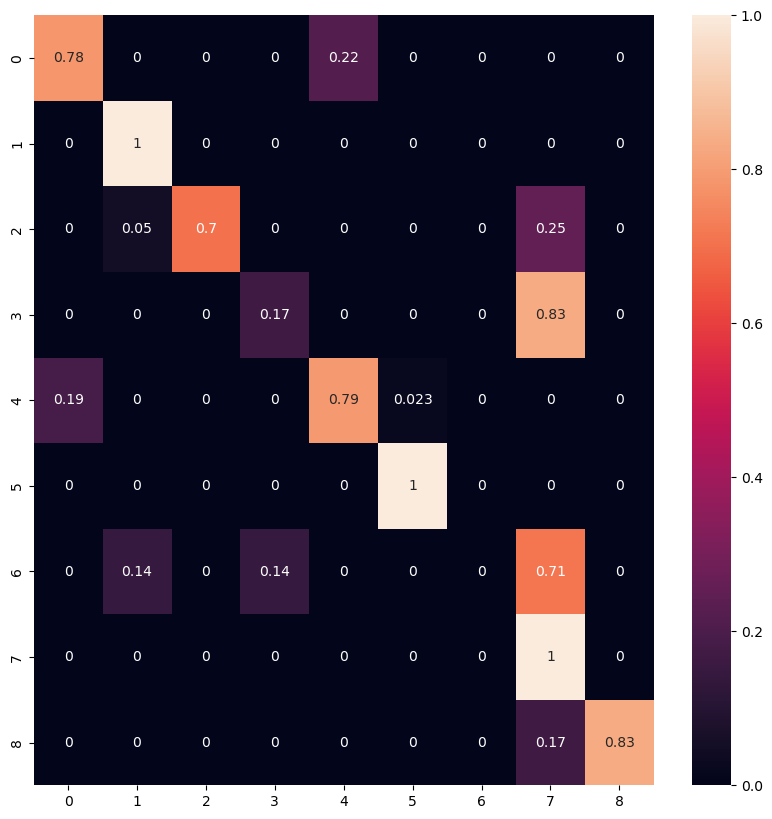

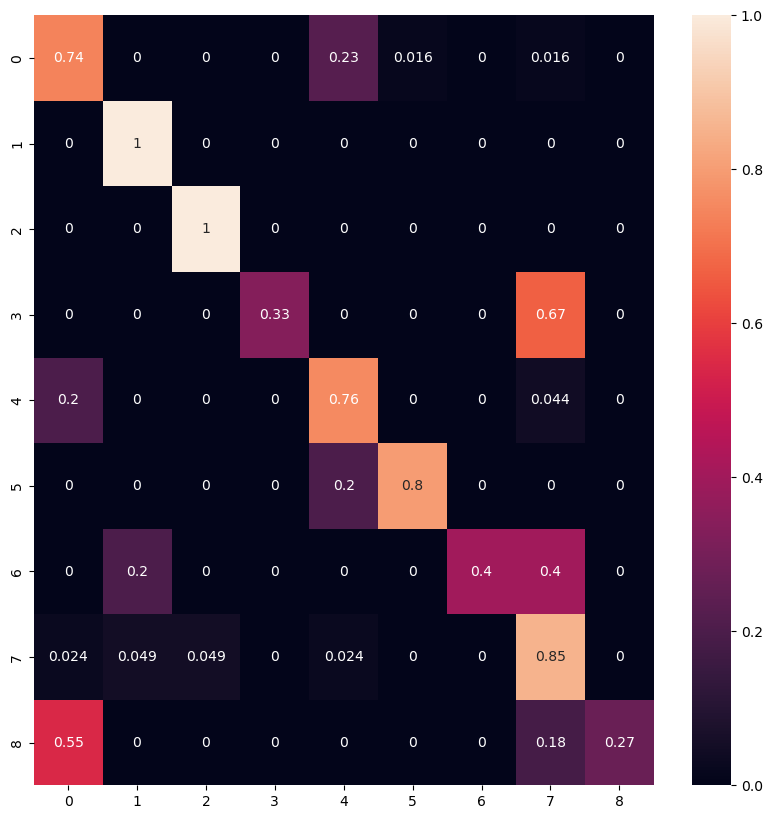

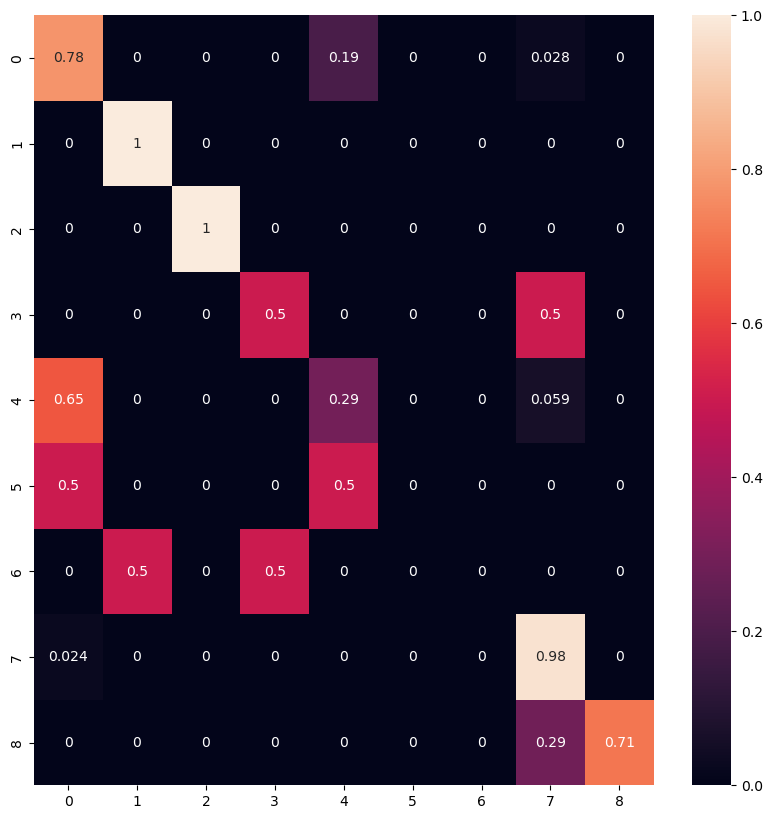

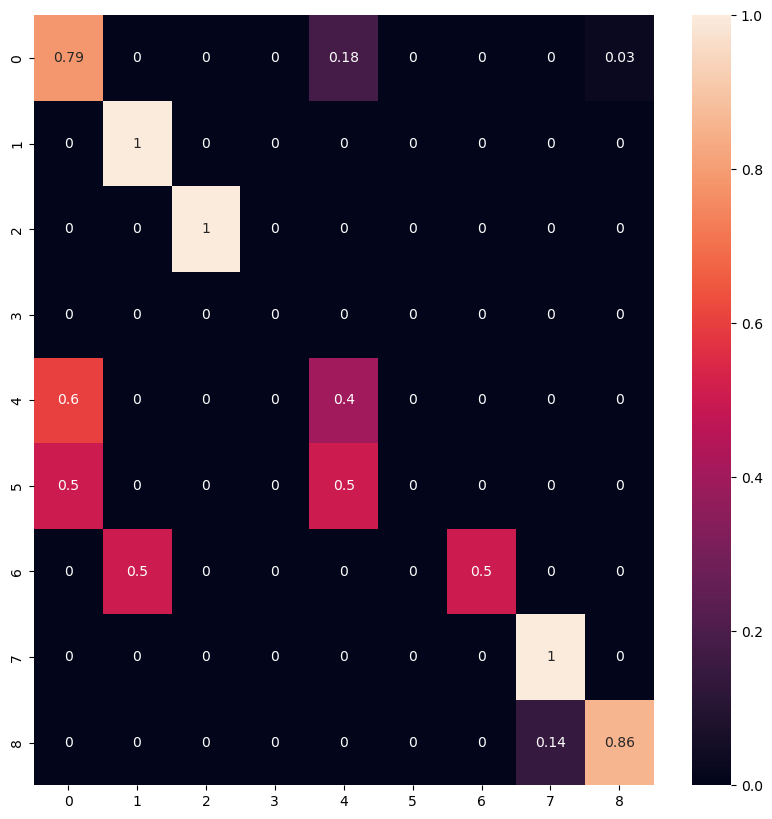

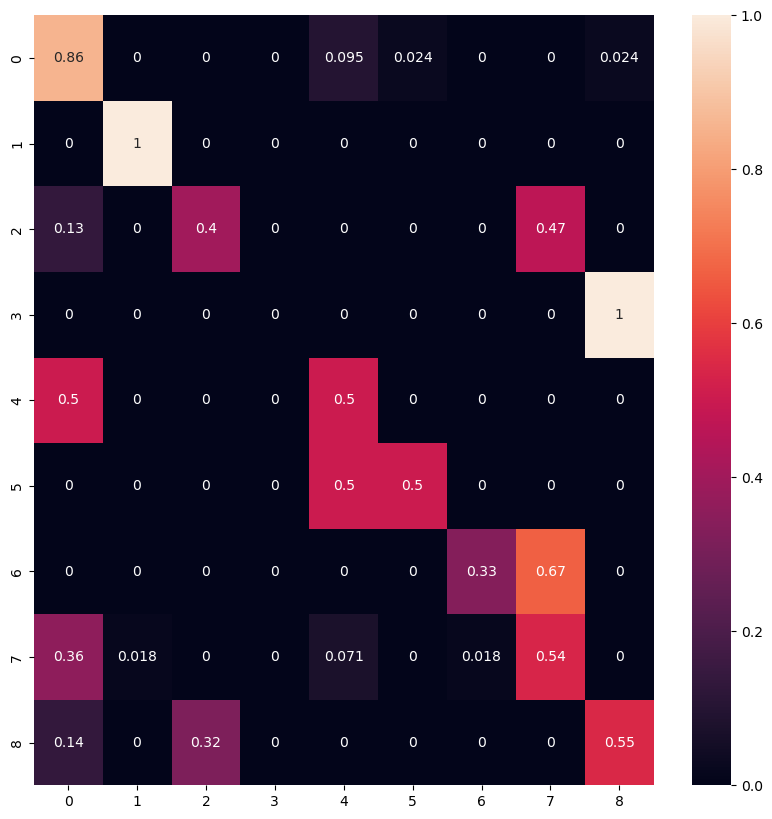

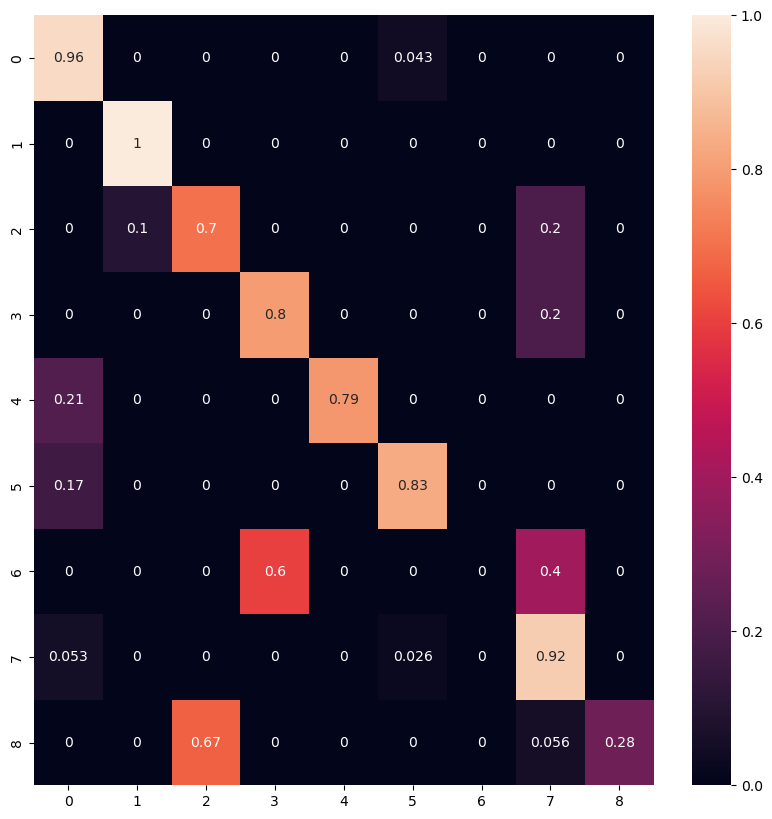

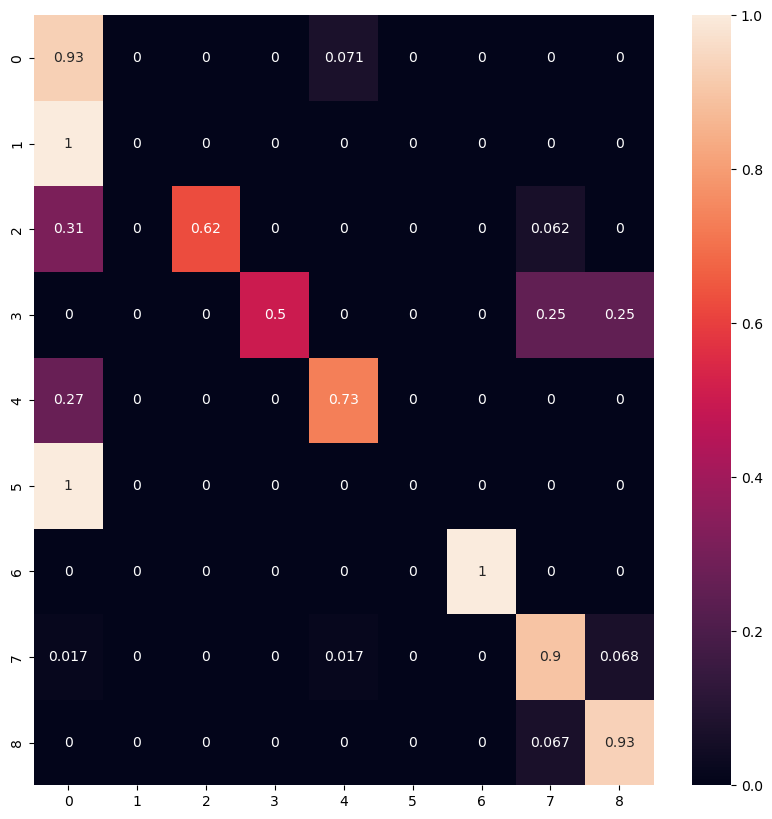

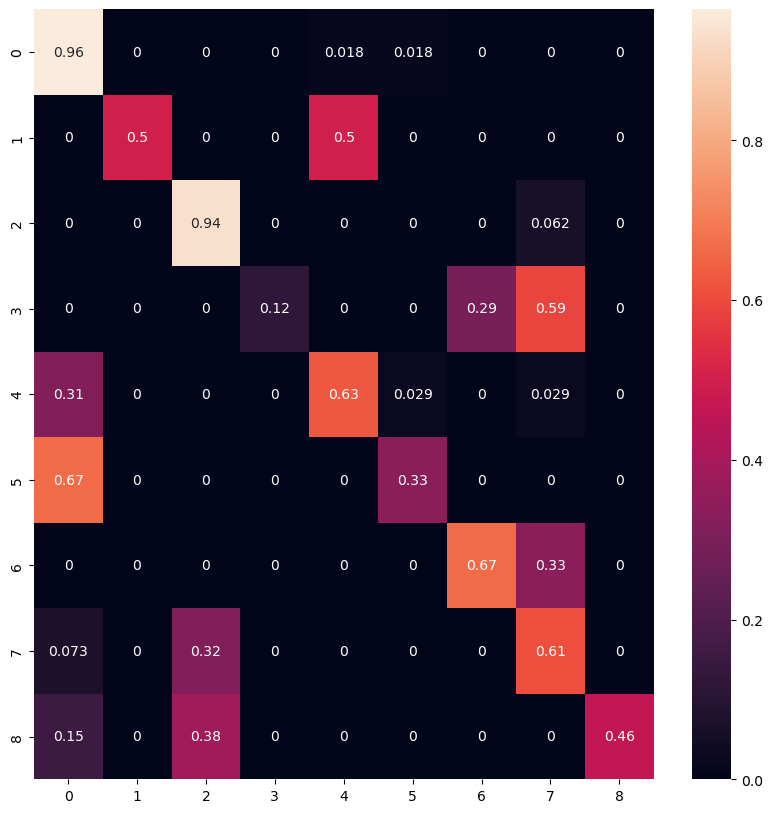

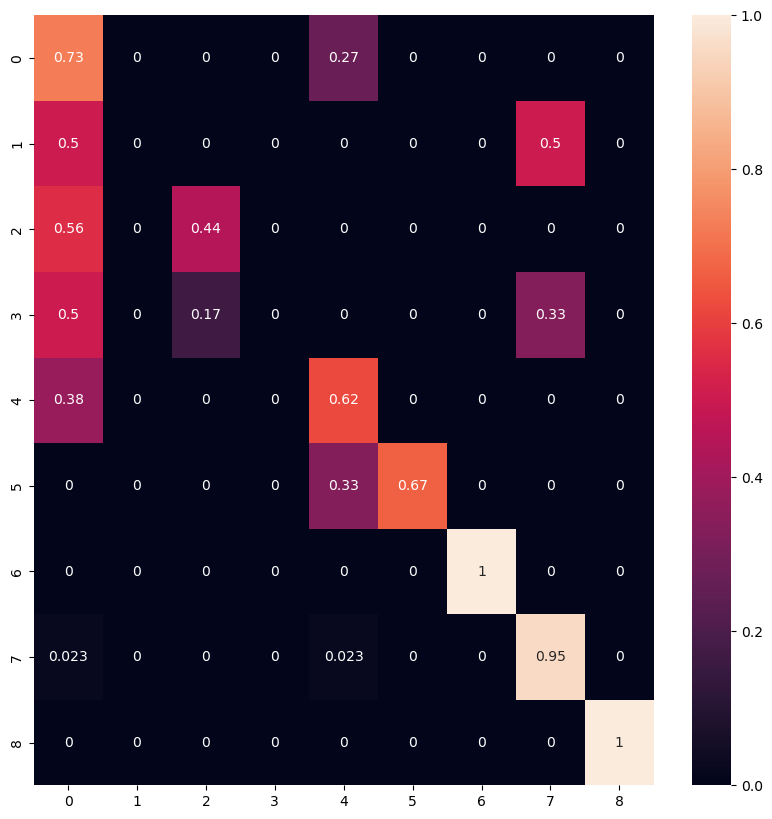

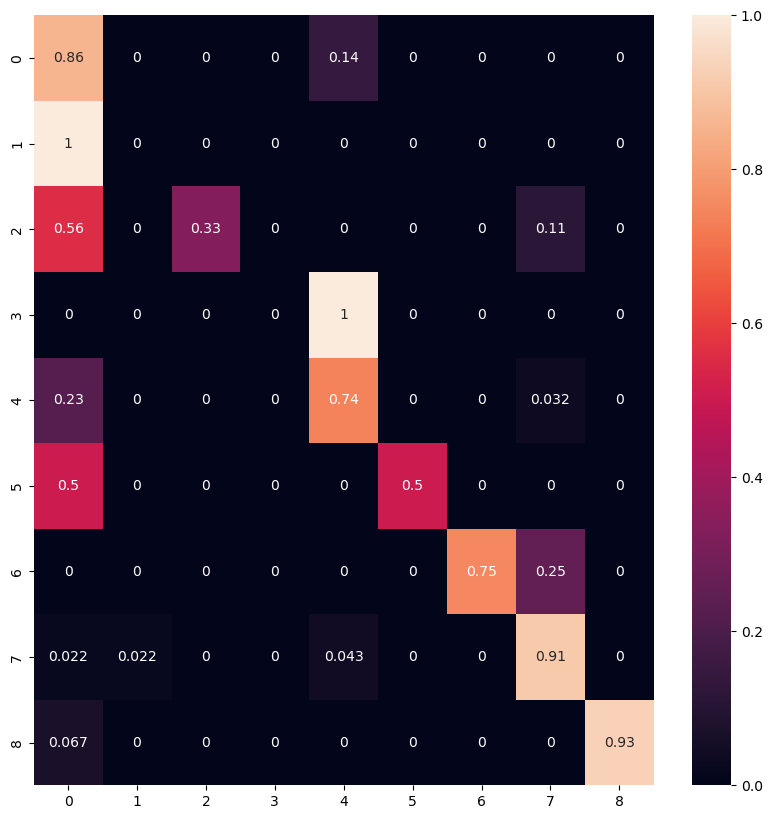

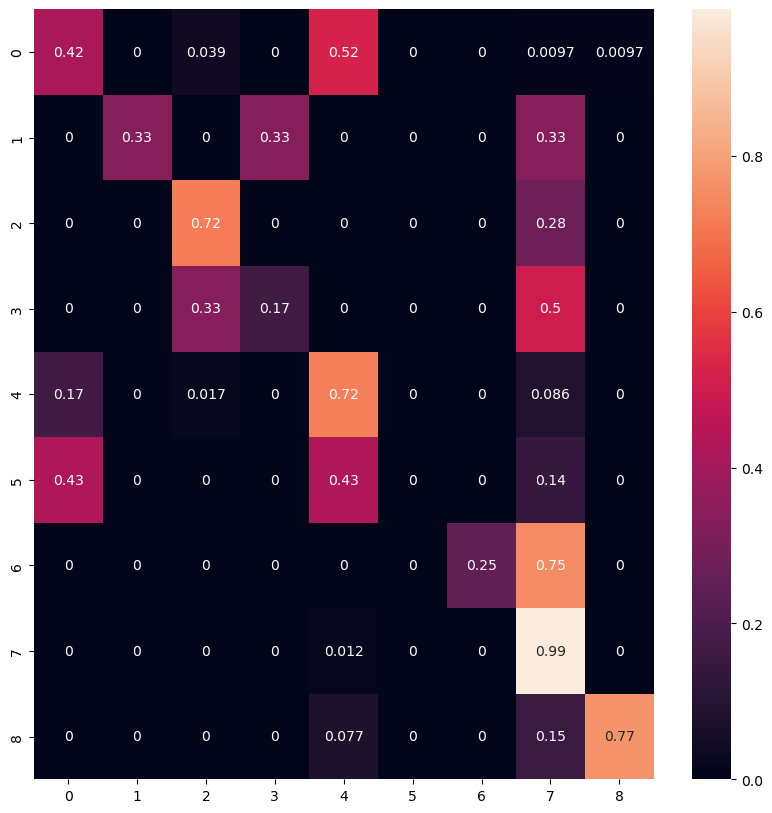

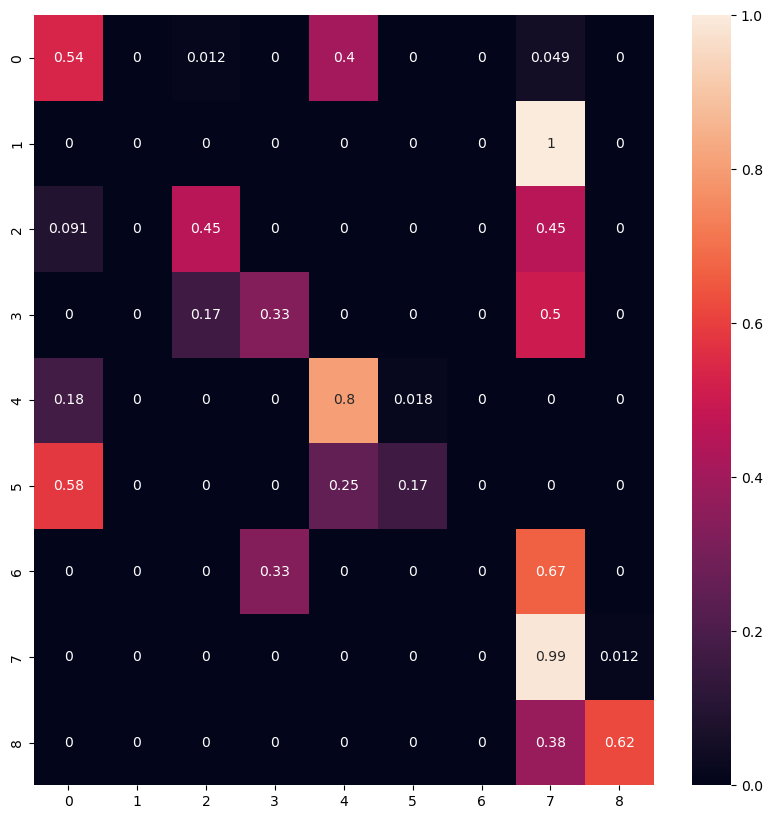

In [63]:
test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s_gan')
out_xgb_no_pre=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_xgb_no_pre(ID,out_xgb_no_pre)
out_df_xgb_no_pre=pd.DataFrame(out_xgb_no_pre,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])
out_df_xgb_no_pre

In [64]:
out_df_xgb_no_pre.describe()

,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,8.000000,12.000000,8.000000,12.000000,8.000000,8.000000,12.000000,12.000000
mean,0.739802,0.724007,0.730049,0.675000,0.703614,0.436038,0.638122,0.621230,0.667460,0.849134,0.760534
std,0.070196,0.070708,0.104620,0.124403,0.204290,0.183111,0.160554,0.229776,0.256118,0.116782,0.187665
min,0.593023,0.588101,0.540881,0.500000,0.428571,0.210526,0.333333,0.266667,0.400000,0.618557,0.428571
25%,0.687458,0.666741,0.650018,0.625000,0.553571,0.250000,0.538325,0.458333,0.433333,0.820028,0.657895
50%,0.756499,0.740364,0.742396,0.666667,0.666122,0.472222,0.686362,0.690476,0.619048,0.879880,0.828431
75%,0.788907,0.771170,0.794430,0.800000,0.854489,0.541667,0.746135,0.800000,0.892857,0.924866,0.870130
max,0.824859,0.813793,0.888889,0.800000,1.000000,0.666667,0.880000,0.888889,1.000000,0.988764,1.000000


In [65]:
# def output_HGBC_no_pre(ID,out):
#     warnings.simplefilter('ignore')
#     test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s_gan/{ID}')
#     test=test.reset_index().rename(columns={test.index.name:'time'})
#     X_test=test.drop(["label","previous_label"],axis=1)
# #     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_HGBC_model2.sav'
#     xgbcl=joblib.load(filename)
#     # xgbcl=joblib.load(filename)
#     pred=xgbcl.predict(X_test)
    
#     test['label1']=pred
#     acc= metrics.accuracy_score(pred,y_test)
#     f1s=metrics.f1_score(y_test,pred,average='weighted')
#     f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
#     f1s0=f1[0]
#     f1s1=f1[1]
#     f1s2=f1[2]
#     f1s3=f1[3]
#     f1s4=f1[4]
#     f1s5=f1[5]
#     f1s6=f1[6]
#     f1s7=f1[7]
#     f1s8=f1[8]
#     ax,fig=plt.subplots(figsize=(10,10))
#     conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
#                                   , normalize='true')
#     sns.heatmap(conf,annot=True)
# #     print(ID)
# #     print(np.unique(pred))
# #     print(np.unique(y_test))
# #     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
#     return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [66]:
# test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s_gan')
# out_rf_no_pre=[]
# for ID in test_set:
#     if ID.endswith(".csv"):
#         output_HGBC_no_pre(ID,out_rf_no_pre)
# out_df_rf_no_pre=pd.DataFrame(out_rf_no_pre,columns=['ID','accuracy','weighted avg F1-score',
#                                        'F1_score class 0',
#                                       'F1_score class 1',
#                                       'F1_score class 2',
#                                       'F1_score class 3',
#                                       'F1_score class 4',
#                                       'F1_score class 5',
#                                       'F1_score class 6',
#                                       'F1_score class 7',
#                                       'F1_score class 8'])
# out_df_rf_no_pre

In [67]:
def output_xgb(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s_gan/{ID}')
    test=test.reset_index().rename(columns={test.index.name:'time'})
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    pred1=pred.copy()
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test_2_turn=test['second_turn'].to_list()
    test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]
    buffer=False
    if (test['label1'][0].item()>0) or (test['label1'][1].item()>0) or (test['label1'][2].item()>0): 
        count=2
        buffer=True
    else: 
        count=1
#     print(ID)
#     print(list(test['label1']))
    buffer0=False
    buffer7=False
    buffer=True
    for i in range(len(turn)):
        
        if (list(test['label1'])[i]<5):
# #             if buffer0==True:
#             if (turn[i]<-5):
#                 if (list(test['label1'])[i]<=list(test['label1'])[i+1]) &(list(test['label1'])[i]>list(test['label1'])[i+2]-3):

#                     count-=1
# #             if (list(test['label1'])[i]==0):
# #                 if (list(test['label1'])[i-1]>6):
# #                     if (turn[i]<-3):
# #                         count-=1
# #                         buffer=False
            if (buffer7==True) &(buffer0==True):
                if (turn[i]<-3):
                    if (list(test['label1'])[i]<=list(test['label1'])[i+1]) &(list(test['label1'])[i]>list(test['label1'])[i+2]-3):

                        count-=1
#             if (list(test['label1'])[i]==0):
#                 if (list(test['label1'])[i-1]>6):
#                     if (turn[i]<-3):
#                         count-=1
#                         buffer=False
            else:
                if (turn[i]<-5):
                    if (list(test['label1'])[i]<=list(test['label1'])[i+1]) &(list(test['label1'])[i]>list(test['label1'])[i+2]-3):

                        count-=1
        else:
#             if ID[:5]=='N02T2':
#                     print(turn[i])
#                     print(list(test['label1'])[i])
            if (turn[i]<-4):
                count-=1
#                 if ID[:5]=='N02T2':
#                     print(count)
        try:
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
                buffer0=True
            if (list(test['label1'])[i]==7)&(list(test['label1'])[i+1]==7):
                buffer7=True
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0)&(buffer7==True)&(buffer0==True)&(buffer==True):
                    count-=1
                    buffer=False
        except: pass
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label1'])[0])
    def fturn_test():
        if list(test['label1'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn_test()
    sturn=True
    after00=[]
    for i in range(len(test['label1'])):
        try:
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
                after0-=1
            if ((list(test['second_turn'])[i]>0) and sturn==True):
                after0=fturn_test()
                sturn=False
            if after0<=0:
        #         print(after0)
                after00.append(1) 
            else:
                after00.append(0)
        except: after00.append(0)
    test['after00']=after00
    after0=fturn_test()
    sturn=True
    after1=[]
    for i in range(len(test['label1'])):
        if (list(test['after00'])[i]==1):
            if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn_test()
    sturn=True
    for i in range(len(test['label1'])):
        if (list(test['after1'])[i]==1):
            if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4

    test=test.drop(['second_turn','turn','after00'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_windowsize3_with_pre_feat3s_gan/smote_HGBC_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
    pd.DataFrame([y_test_a.to_list(),pred1, pred,after00,after1,after4,turn_2,test_2_turn,turn]).T.to_csv(f'./pred{ID[:5]}.csv')
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [68]:
# out_df_xgb

8
7
7
8
8
7
7
2
8
8
8
8


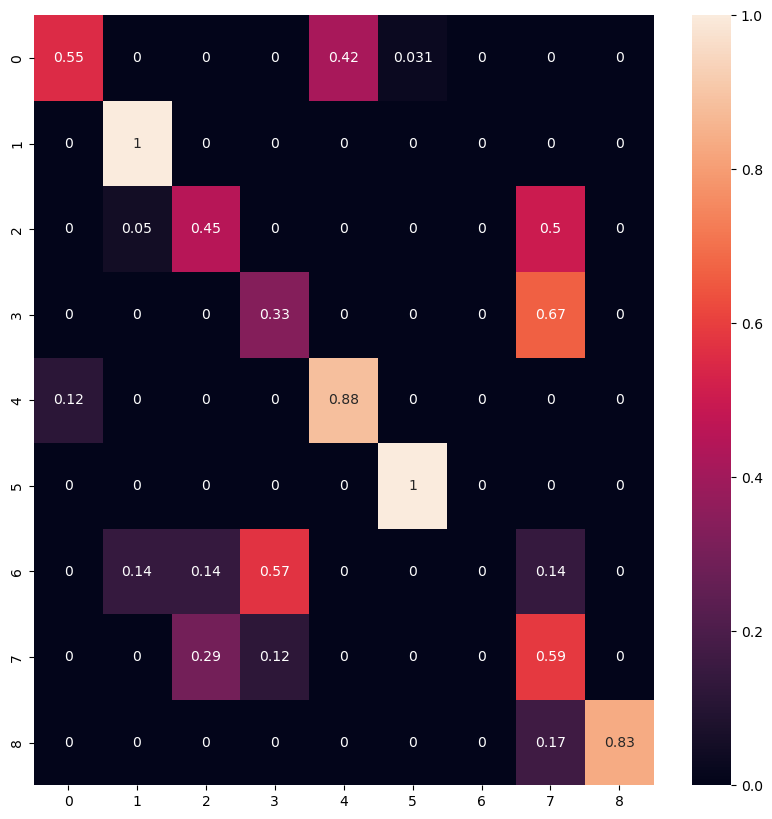

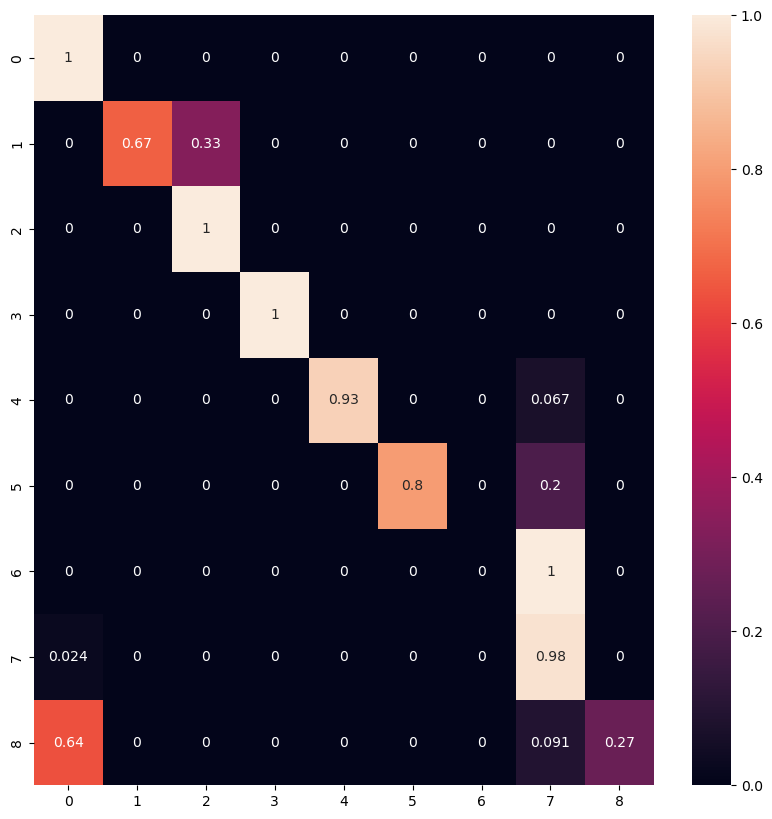

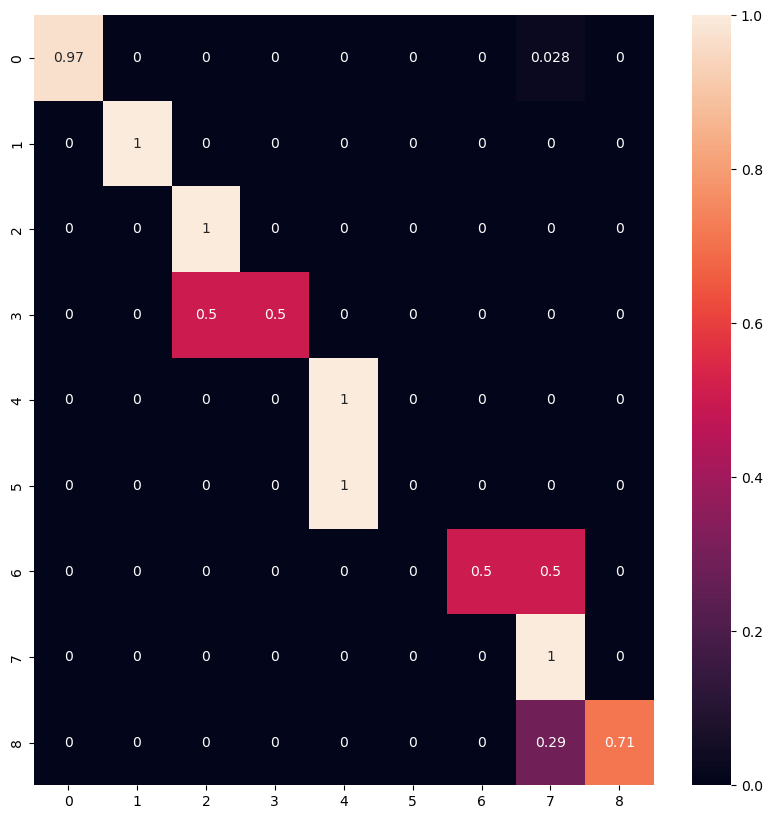

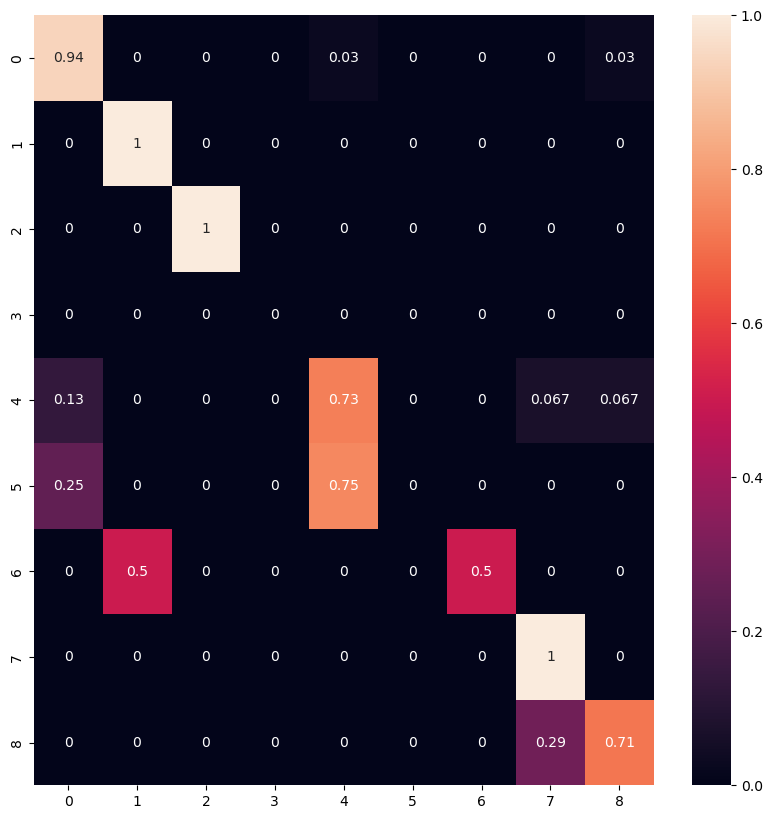

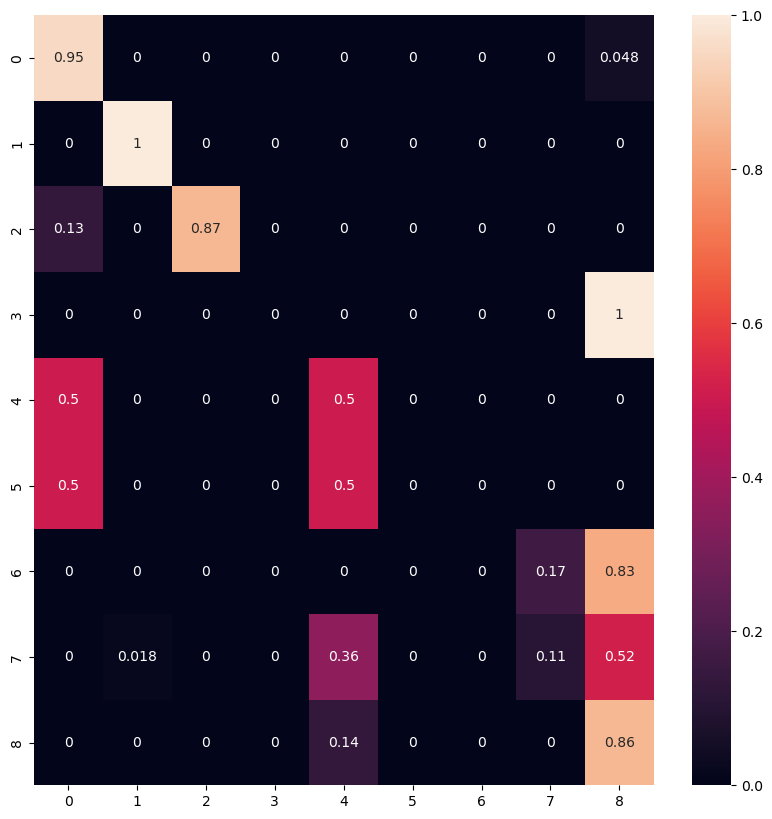

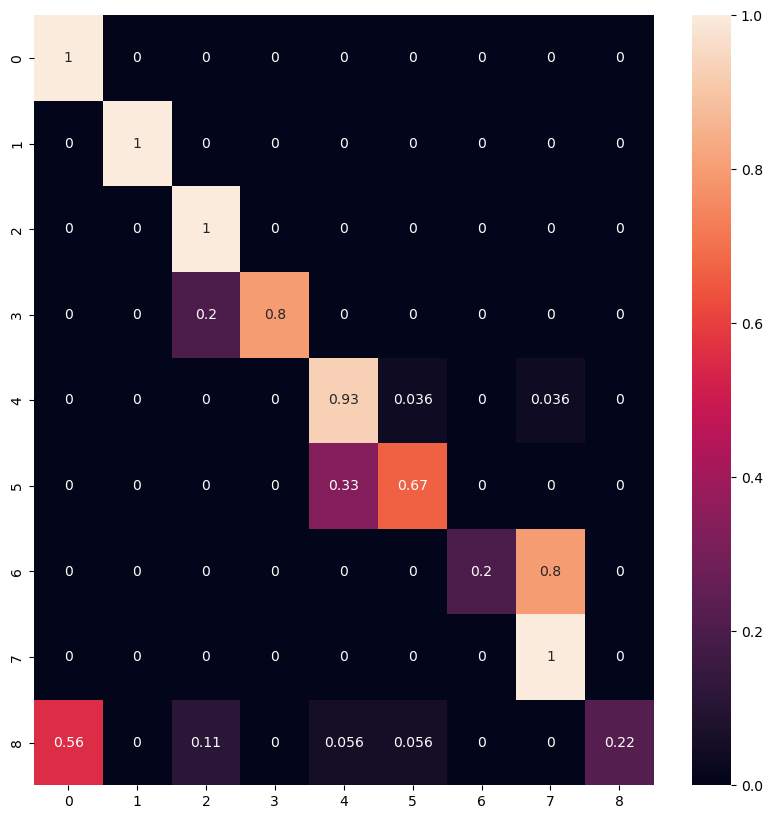

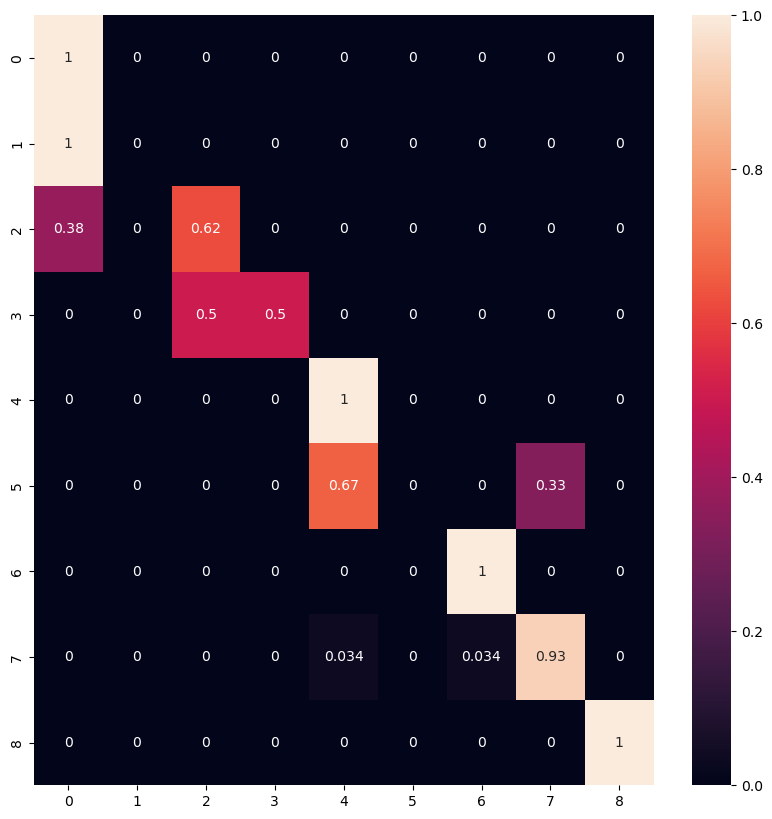

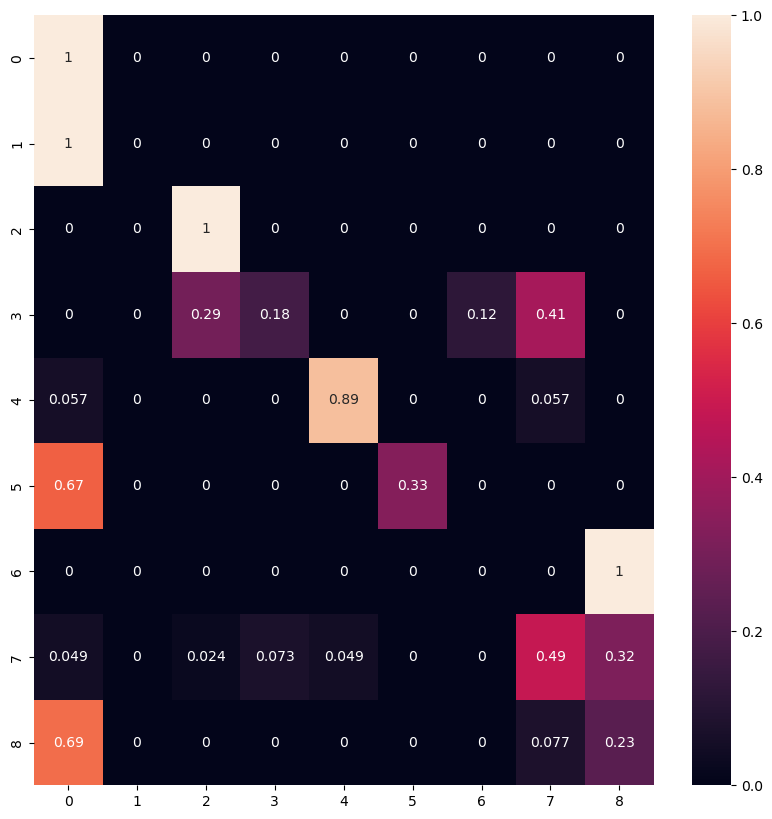

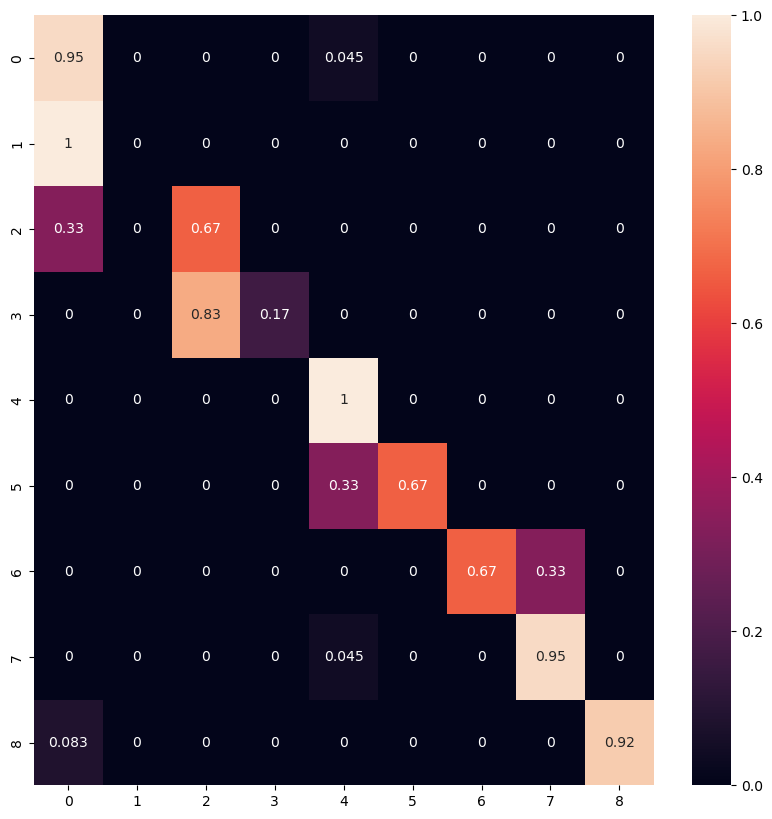

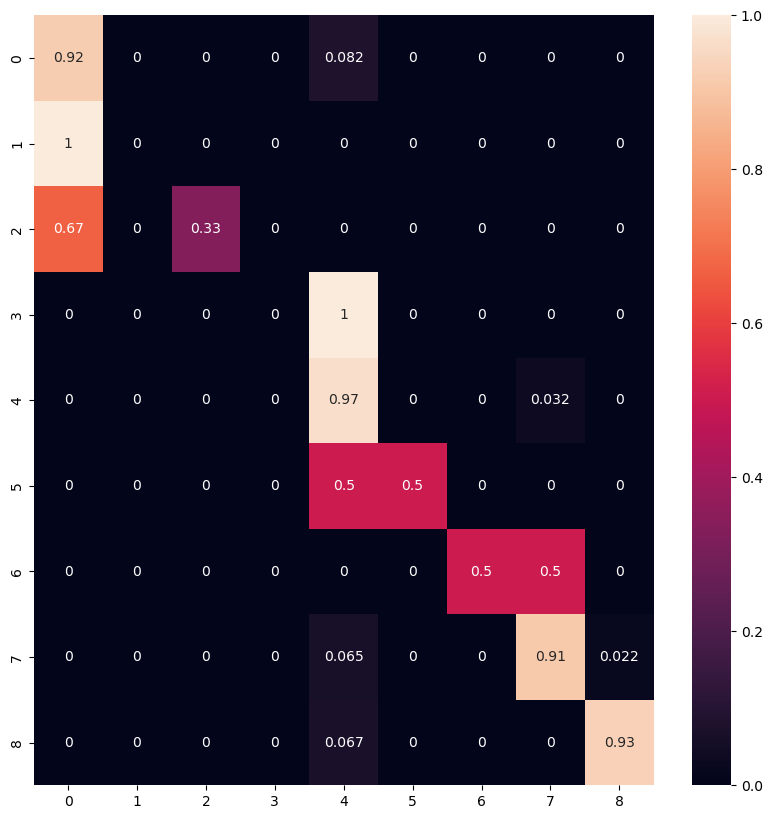

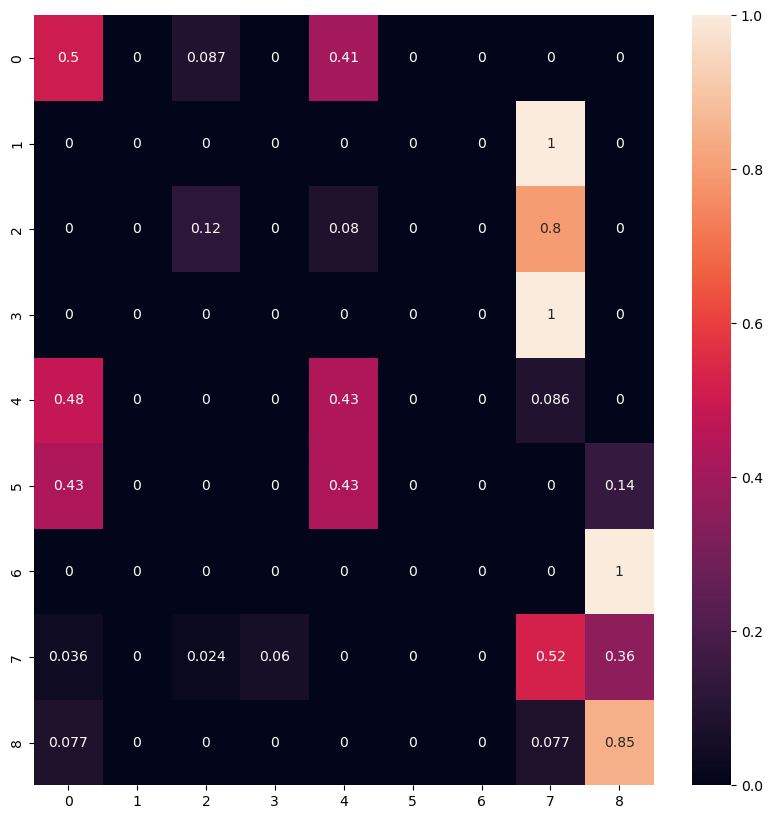

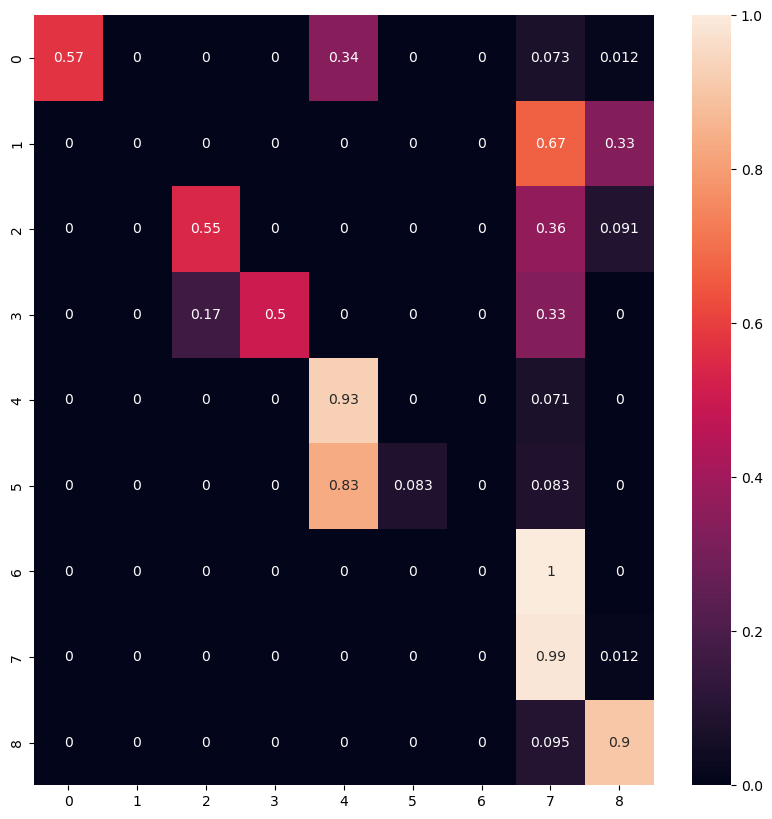

In [69]:
test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s_gan')
out_xgb=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_xgb(ID,out_xgb)

out_df_xgb=pd.DataFrame(out_xgb,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])



In [70]:
out_df_xgb.describe()

,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,6.000000,12.000000,8.000000,12.000000,7.000000,6.000000,12.000000,12.000000
mean,0.774170,0.752819,0.842472,0.816667,0.720011,0.585684,0.781991,0.639438,0.665079,0.774563,0.669232
std,0.163378,0.167959,0.128179,0.183485,0.256170,0.290673,0.202014,0.248499,0.181744,0.249673,0.283360
min,0.445545,0.438053,0.547368,0.500000,0.153846,0.250000,0.384615,0.153846,0.333333,0.190476,0.187500
25%,0.678763,0.658498,0.794415,0.800000,0.575000,0.279503,0.710173,0.583333,0.666667,0.569416,0.414649
50%,0.860296,0.837609,0.896525,0.800000,0.778195,0.666667,0.878418,0.666667,0.666667,0.901099,0.773810
75%,0.891507,0.874962,0.916126,0.950000,0.924451,0.722222,0.924851,0.800000,0.766667,0.954247,0.915152
max,0.939130,0.927652,0.985915,1.000000,1.000000,1.000000,0.965517,0.888889,0.857143,0.967033,1.000000


In [71]:
out_df_xgb

,ID,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
0,S08T1,0.618280,0.610179,0.679245,0.5,0.450000,0.250000,0.703704,0.800000,NaN,0.571429,0.909091
1,S08T2,0.901554,0.879828,0.939394,0.8,0.972973,1.000000,0.965517,0.888889,NaN,0.879121,0.428571
2,N11T1,0.939130,0.927652,0.985915,1.0,0.923077,0.666667,0.944444,NaN,0.666667,0.953488,0.833333
3,N11T2,0.884956,0.867434,0.925373,0.8,1.000000,NaN,0.733333,NaN,0.666667,0.967033,0.714286
4,N06T1,0.540698,0.476332,0.816327,0.8,0.928571,NaN,0.412698,NaN,NaN,0.190476,0.487179
5,S02T2,0.853503,0.821915,0.901961,1.0,0.869565,0.888889,0.912281,0.666667,0.333333,0.938272,0.363636
6,N06T2,0.903955,0.887829,0.913043,NaN,0.714286,0.666667,0.937500,NaN,0.857143,0.956522,1.000000
7,S02T1,0.698925,0.674605,0.868217,NaN,0.842105,0.260870,0.911765,0.500000,NaN,0.563380,0.187500
8,N02T2,0.888158,0.873340,0.913043,NaN,0.600000,0.285714,0.920635,0.800000,0.800000,0.965517,0.956522
9,N02T1,0.867089,0.853304,0.891089,NaN,0.500000,NaN,0.845070,0.666667,0.666667,0.923077,0.933333


In [72]:
def output_xgb(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s/{ID}')
    test=test.reset_index().rename(columns={test.index.name:'time'})
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model_windowsize3_with_pre_feat3s/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    
    test['label1']=pred
    pred1=pred.copy()
    # turn2
    test['previous_label']=test['label1']
    test['second_turn']=test['previous_label'].diff()
    test_2_turn=test['second_turn'].to_list()
    test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
    turn=list(test['second_turn'])
    turn_2=[]
    buffer=False
    if (test['label1'][0].item()>0) or (test['label1'][1].item()>0) or (test['label1'][2].item()>0): 
        count=2
        buffer=True
    else: 
        count=1
#     print(ID)
#     print(list(test['label1']))
    buffer0=False
    buffer7=False
    buffer=True
    for i in range(len(turn)):
        
        if (list(test['label1'])[i]<5):
            if (turn[i]<-5):
                if (list(test['label1'])[i]<=list(test['label1'])[i+1]) &(list(test['label1'])[i]>list(test['label1'])[i+2]-3):
            
                    count-=1
#             if (list(test['label1'])[i]==0):
#                 if (list(test['label1'])[i-1]>6):
#                     if (turn[i]<-3):
#                         count-=1
#                         buffer=False
        else:
#             if ID[:5]=='N02T2':
#                     print(turn[i])
#                     print(list(test['label1'])[i])
            if (turn[i]<-4):
                count-=1
#                 if ID[:5]=='N02T2':
#                     print(count)
        try:
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
                buffer0=True
            if (list(test['label1'])[i]==7)&(list(test['label1'])[i+1]==7):
                buffer7=True
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0)&(buffer7==True)&(buffer0==True)&(buffer==True):
                    count-=1
                    buffer=False
        except: pass
        if count<=0:
            turn_2.append(1) 
        else:
            turn_2.append(0) 
    test['turn']=turn
    test['second_turn']=turn_2

    print(list(test['label1'])[0])
    def fturn_test():
        if list(test['label1'])[0]>0: 
            after0=1
        else: after0=1
        return after0
    after0=fturn_test()
    sturn=True
    after00=[]
    for i in range(len(test['label1'])):
        try:
            if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
                after0-=1
            if ((list(test['second_turn'])[i]>0) and sturn==True):
                after0=fturn_test()
                sturn=False
            if after0<=0:
        #         print(after0)
                after00.append(1) 
            else:
                after00.append(0)
        except: after00.append(0)
    test['after00']=after00
    after0=fturn_test()
    sturn=True
    after1=[]
    for i in range(len(test['label1'])):
        if (list(test['after00'])[i]==1):
            if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after1.append(1) 
        else:
            after1.append(0) 
    test['after1']=after1
    after4=[]
    after0=fturn_test()
    sturn=True
    for i in range(len(test['label1'])):
        if (list(test['after1'])[i]==1):
            if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
                after0-=1
        if (list(test['second_turn'])[i]>0) and sturn==True:
            after0=fturn_test()
            sturn=False
        if after0<=0:
    #         print(after0)
            after4.append(1) 
        else:
            after4.append(0) 

    test['after4']=after4

    test=test.drop(['second_turn','turn','after00'],axis=1)
    X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
    # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test_a=test['label']
    filename = './model_windowsize3_with_pre_feat3s/smote_HGBC_model_after.sav'
    HGBC=joblib.load( filename)
    pred=HGBC.predict(X_test_a)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(y_test,pred,average='weighted')
    f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
    f1s0=f1[0]
    f1s1=f1[1]
    f1s2=f1[2]
    f1s3=f1[3]
    f1s4=f1[4]
    f1s5=f1[5]
    f1s6=f1[6]
    f1s7=f1[7]
    f1s8=f1[8]
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
                                  , normalize='true')
    sns.heatmap(conf,annot=True)
    pd.DataFrame([y_test_a.to_list(),pred1, pred,after00,after1,after4,turn_2,test_2_turn,turn]).T.to_csv(f'./pred{ID[:5]}.csv')
#     print(ID)
#     print(np.unique(pred))
#     print(np.unique(y_test))
#     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

8
0
8
8
8
8
8
0
8
8
8
8


,accuracy,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
count,12.000000,12.000000,12.000000,8.000000,12.000000,9.000000,12.000000,9.000000,10.000000,12.000000,12.000000
mean,0.830195,0.824098,0.901500,0.808333,0.825318,0.615556,0.822994,0.632558,0.590260,0.840842,0.761798
std,0.112002,0.111849,0.103198,0.225902,0.173833,0.158714,0.128165,0.210368,0.242022,0.147442,0.201706
min,0.597360,0.597492,0.660194,0.500000,0.484848,0.400000,0.537634,0.153846,0.285714,0.560000,0.338462
25%,0.795590,0.793701,0.886497,0.625000,0.710728,0.500000,0.738690,0.571429,0.500000,0.756073,0.672059
50%,0.877302,0.872628,0.944815,0.900000,0.890110,0.600000,0.874197,0.666667,0.522727,0.903600,0.857143
75%,0.898972,0.888750,0.960095,1.000000,0.952462,0.666667,0.903982,0.750000,0.642857,0.946996,0.905844
max,0.949367,0.943837,0.987952,1.000000,1.000000,0.888889,0.966292,0.857143,1.000000,0.976744,1.000000


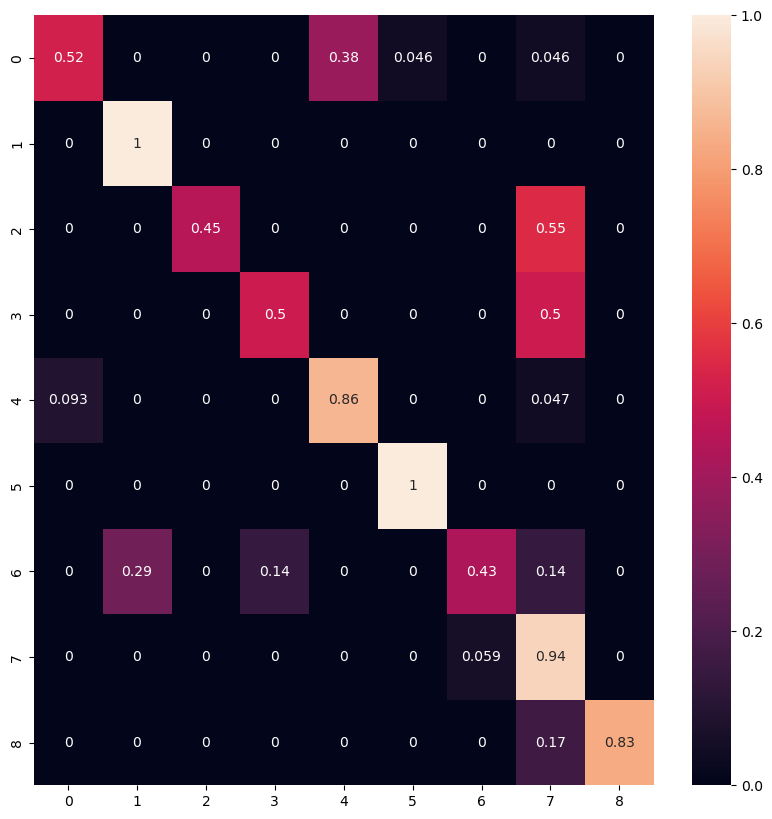

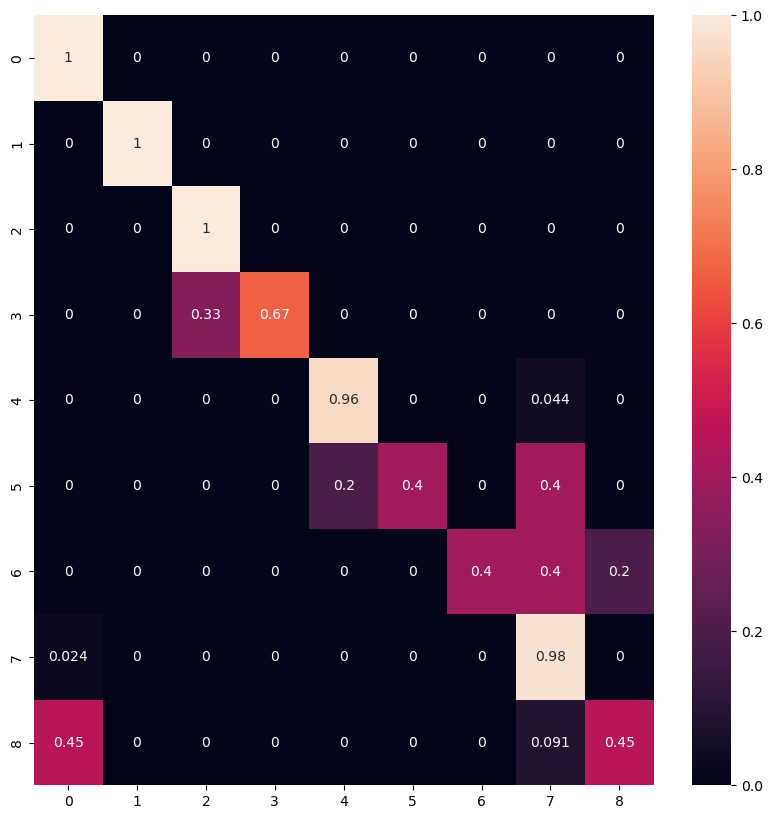

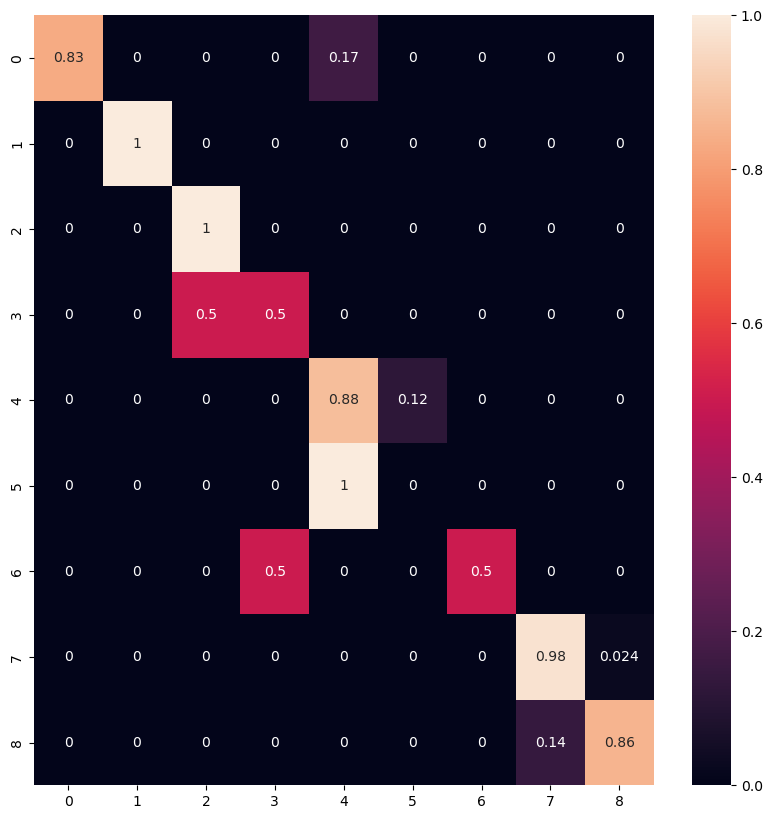

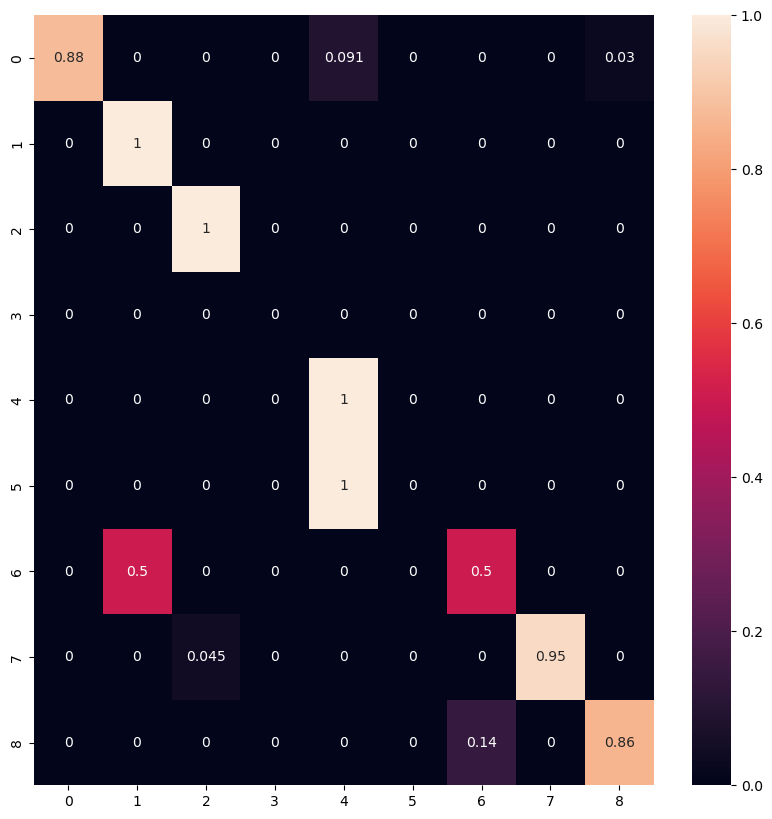

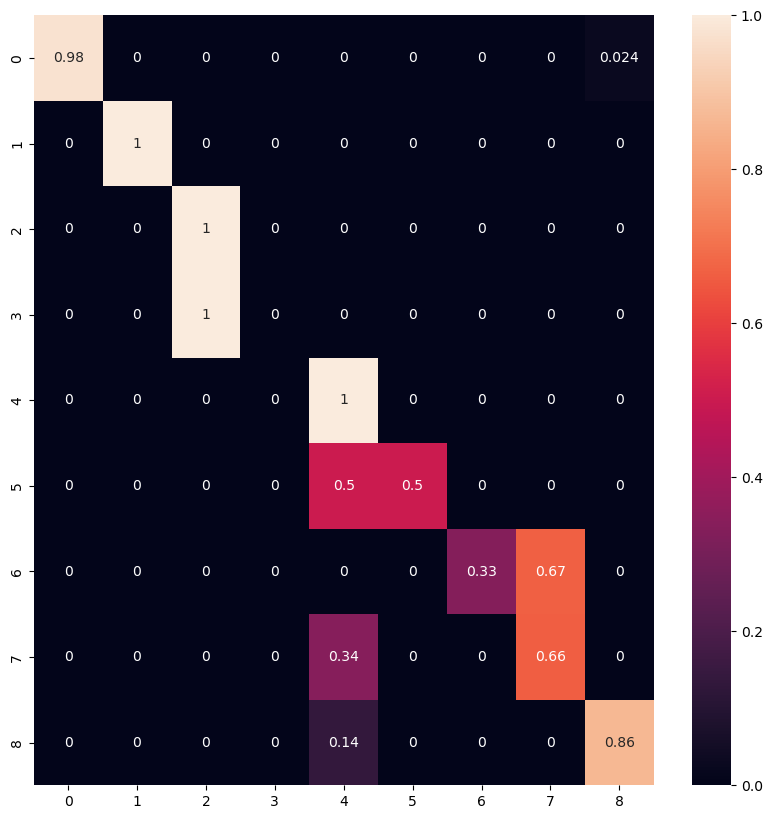

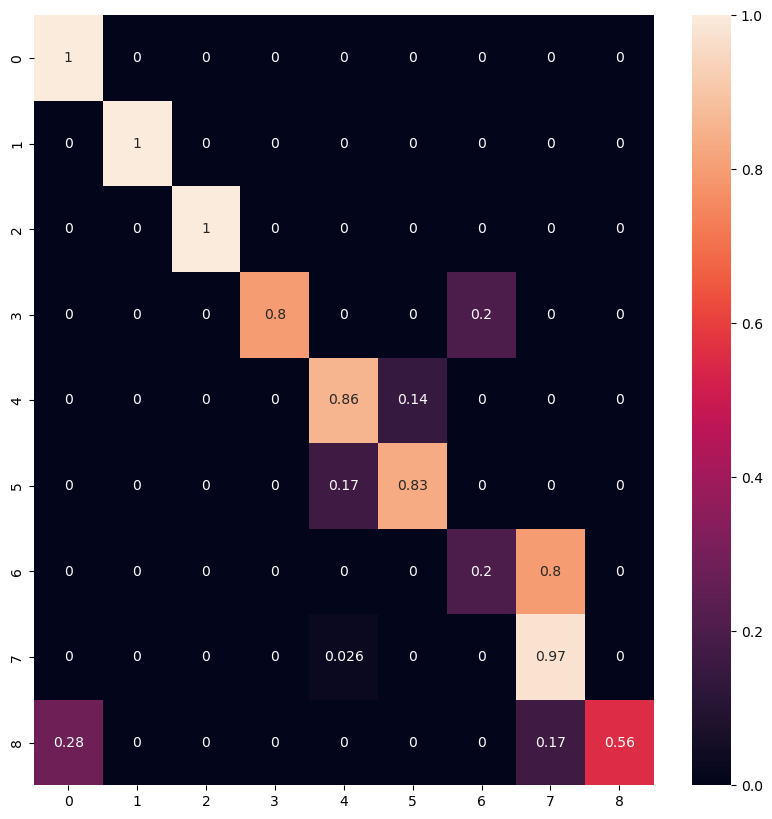

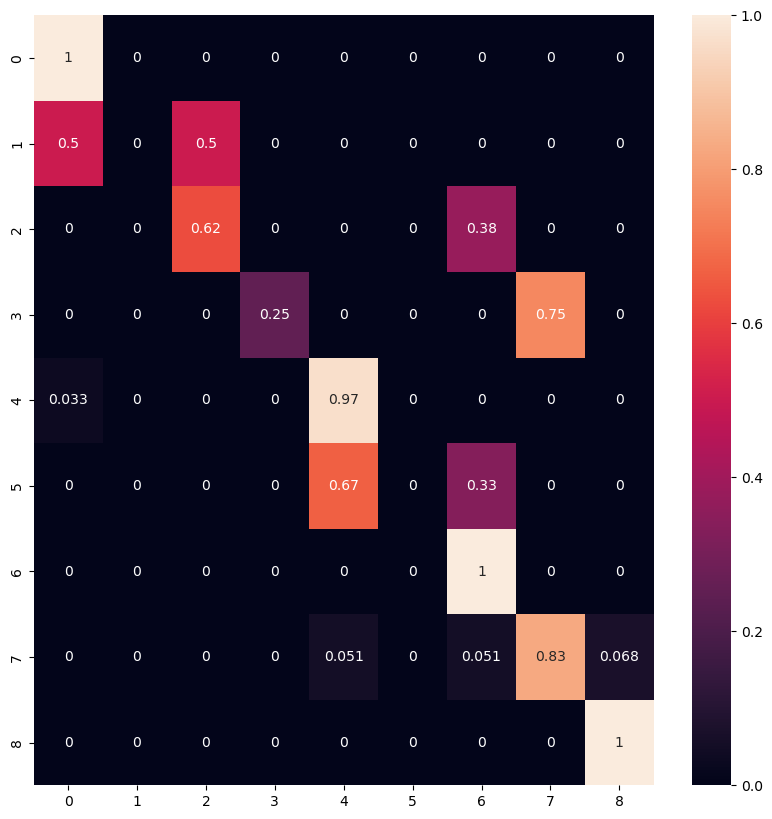

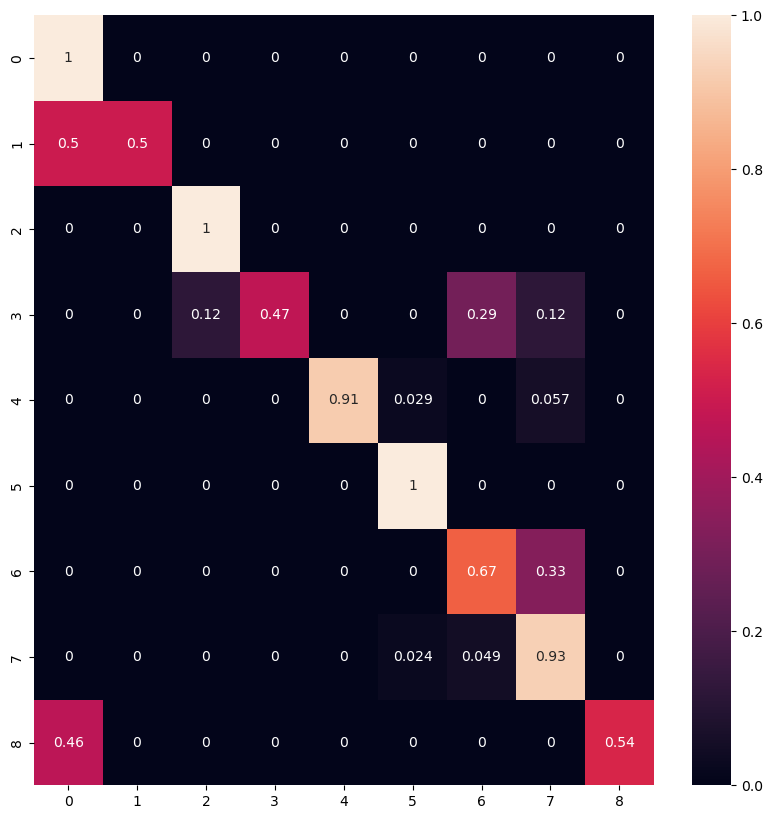

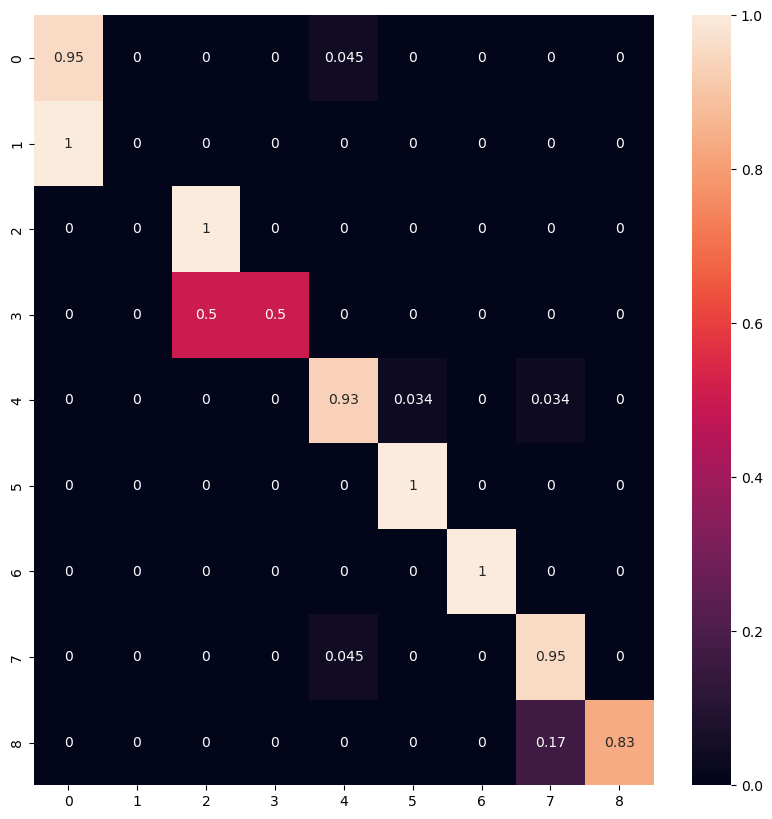

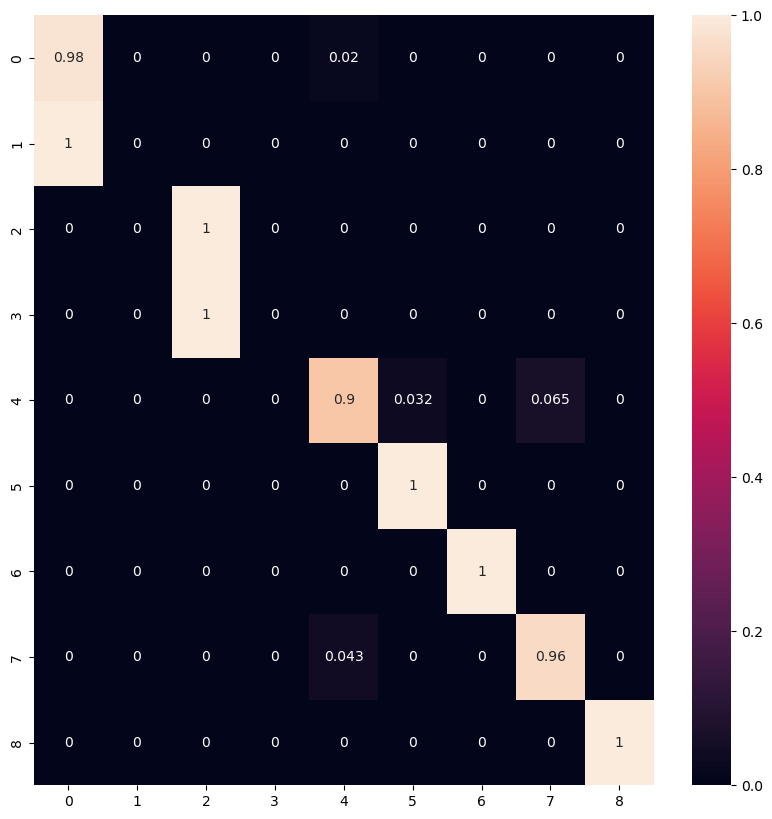

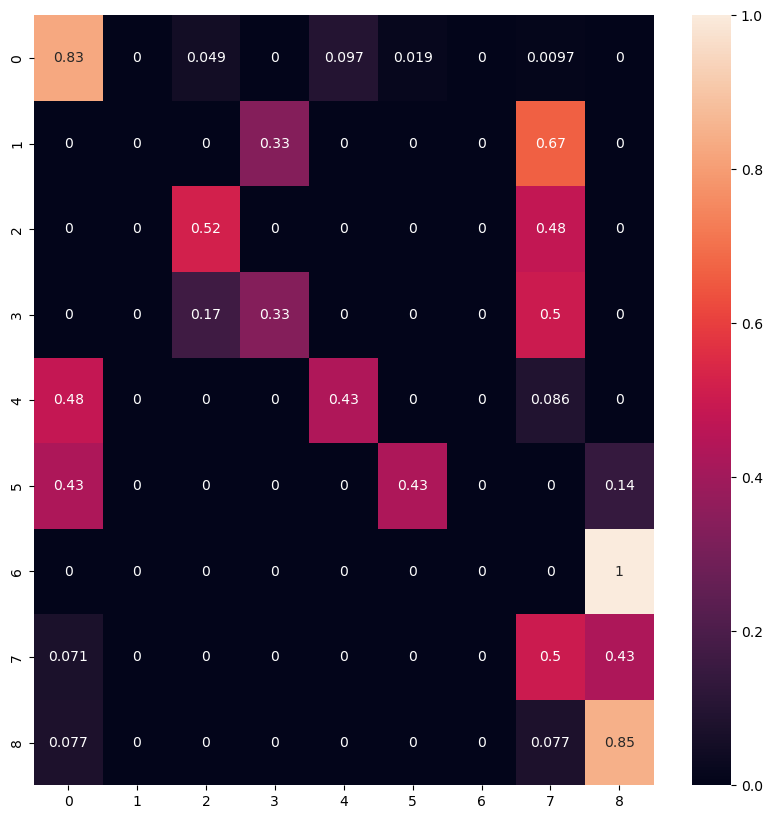

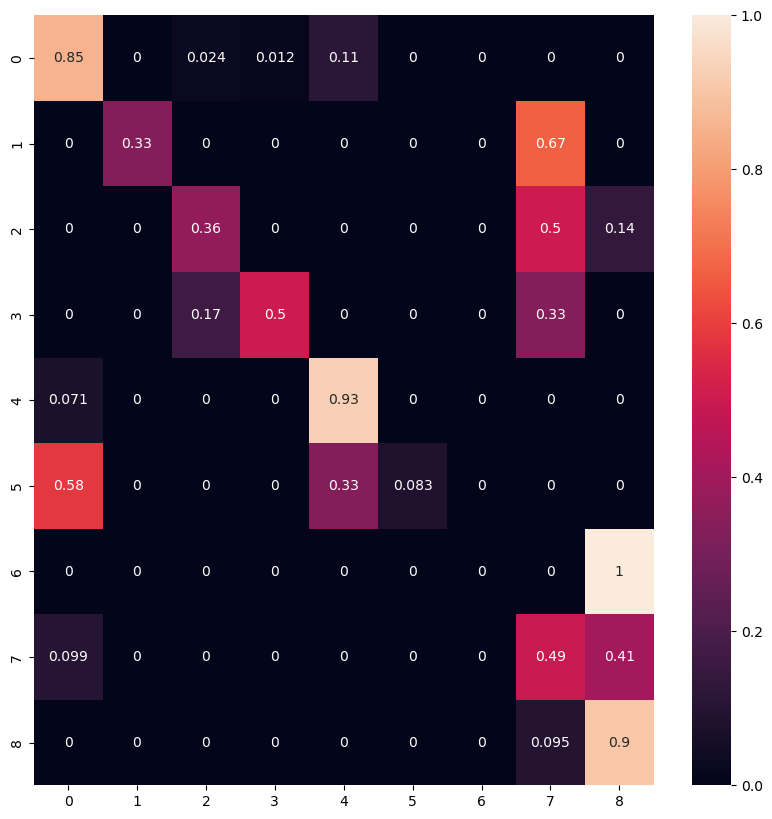

In [73]:
test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s')
out_xgb_no_gan=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_xgb(ID,out_xgb_no_gan)

out_df_xgb_no_gan=pd.DataFrame(out_xgb_no_gan,columns=['ID','accuracy','weighted avg F1-score',
                                       'F1_score class 0',
                                      'F1_score class 1',
                                      'F1_score class 2',
                                      'F1_score class 3',
                                      'F1_score class 4',
                                      'F1_score class 5',
                                      'F1_score class 6',
                                      'F1_score class 7',
                                      'F1_score class 8'])

out_df_xgb_no_gan.describe()

In [74]:
out_df_xgb=out_df_xgb.set_index('ID')
out_df_xgb_no_gan=out_df_xgb_no_gan.set_index('ID')
out_df_xgb_no_gan.columns=[i+' no_gan' for i in out_df_xgb_no_gan.columns]
output=pd.concat([out_df_xgb_no_gan,out_df_xgb],axis=1)
output

,accuracy no_gan,weighted avg F1-score no_gan,F1_score class 0 no_gan,F1_score class 1 no_gan,F1_score class 2 no_gan,F1_score class 3 no_gan,F1_score class 4 no_gan,F1_score class 5 no_gan,F1_score class 6 no_gan,F1_score class 7 no_gan,...,weighted avg F1-score,F1_score class 0,F1_score class 1,F1_score class 2,F1_score class 3,F1_score class 4,F1_score class 5,F1_score class 6,F1_score class 7,F1_score class 8
ID,,,,,,,,,,,,,,,,,,,,,
S08T1,0.688172,0.680679,0.660194,0.500000,0.620690,0.600000,0.704762,0.727273,0.500000,0.735632,...,0.610179,0.679245,0.5,0.450000,0.250000,0.703704,0.800000,NaN,0.571429,0.909091
S08T2,0.917098,0.906698,0.953846,1.000000,0.972973,0.800000,0.966292,0.571429,0.571429,0.909091,...,0.879828,0.939394,0.8,0.972973,1.000000,0.965517,0.888889,NaN,0.879121,0.428571
N11T1,0.878261,0.881296,0.909091,1.000000,0.923077,0.500000,0.750000,NaN,0.666667,0.975610,...,0.927652,0.985915,1.0,0.923077,0.666667,0.944444,NaN,0.666667,0.953488,0.833333
N11T2,0.893805,0.882768,0.935484,0.800000,0.857143,NaN,0.810811,NaN,0.500000,0.976744,...,0.867434,0.925373,0.8,1.000000,NaN,0.733333,NaN,0.666667,0.967033,0.714286
N06T1,0.831395,0.831375,0.987952,1.000000,0.967742,NaN,0.693333,0.666667,0.500000,0.762887,...,0.476332,0.816327,0.8,0.928571,NaN,0.412698,NaN,NaN,0.190476,0.487179
S02T2,0.878981,0.869685,0.948454,1.000000,1.000000,0.888889,0.888889,0.666667,0.285714,0.902439,...,0.821915,0.901961,1.0,0.869565,0.888889,0.912281,0.666667,0.333333,0.938272,0.363636
N06T2,0.858757,0.848931,0.976744,NaN,0.740741,0.400000,0.906250,NaN,0.545455,0.882883,...,0.887829,0.913043,NaN,0.714286,0.666667,0.937500,NaN,0.857143,0.956522,1.000000
S02T1,0.876344,0.875571,0.941176,0.666667,0.941176,0.640000,0.955224,0.750000,0.333333,0.904762,...,0.674605,0.868217,NaN,0.842105,0.260870,0.911765,0.500000,NaN,0.563380,0.187500
N02T2,0.914474,0.906730,0.954545,NaN,0.857143,0.666667,0.900000,0.857143,1.000000,0.943820,...,0.873340,0.913043,NaN,0.600000,0.285714,0.920635,0.800000,0.800000,0.965517,0.956522


In [75]:
out=output.loc[:,['accuracy no_gan','accuracy','weighted avg F1-score no_gan','weighted avg F1-score']]
out

,accuracy no_gan,accuracy,weighted avg F1-score no_gan,weighted avg F1-score
ID,,,,
S08T1,0.688172,0.618280,0.680679,0.610179
S08T2,0.917098,0.901554,0.906698,0.879828
N11T1,0.878261,0.939130,0.881296,0.927652
N11T2,0.893805,0.884956,0.882768,0.867434
N06T1,0.831395,0.540698,0.831375,0.476332
S02T2,0.878981,0.853503,0.869685,0.821915
N06T2,0.858757,0.903955,0.848931,0.887829
S02T1,0.876344,0.698925,0.875571,0.674605
N02T2,0.914474,0.888158,0.906730,0.873340


In [86]:
out['deltaAcc']=out['accuracy no_gan']-out['accuracy']
out['deltaF1']=out['weighted avg F1-score no_gan']-out['weighted avg F1-score']
out

,accuracy no_gan,accuracy,weighted avg F1-score no_gan,weighted avg F1-score,deltaAcc,deltaF1
ID,,,,,,
S08T1,0.688172,0.618280,0.680679,0.610179,0.069892,0.070500
S08T2,0.917098,0.901554,0.906698,0.879828,0.015544,0.026870
N11T1,0.878261,0.939130,0.881296,0.927652,-0.060870,-0.046356
N11T2,0.893805,0.884956,0.882768,0.867434,0.008850,0.015333
N06T1,0.831395,0.540698,0.831375,0.476332,0.290698,0.355043
S02T2,0.878981,0.853503,0.869685,0.821915,0.025478,0.047771
N06T2,0.858757,0.903955,0.848931,0.887829,-0.045198,-0.038898
S02T1,0.876344,0.698925,0.875571,0.674605,0.177419,0.200966
N02T2,0.914474,0.888158,0.906730,0.873340,0.026316,0.033390


In [89]:
print(out.deltaF1.mean())
print(out.deltaAcc.mean())

0.07127950560783934
0.05602440709157525


In [90]:
out['accuracy no_gan'].median()-out['accuracy'].median()

0.0170065816392051

In [91]:
out['weighted avg F1-score no_gan'].median()-out['weighted avg F1-score'].median()

0.03501843008869998

In [76]:
# def output_xgb(ID,out):
#     warnings.simplefilter('ignore')
#     test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s_gan/{ID}')
#     test=test.reset_index().rename(columns={test.index.name:'time'})
#     X_test=test.drop(["label","previous_label"],axis=1)
# #     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_xgb_model2.sav'
#     xgbcl=joblib.load(filename)
#     # xgbcl=joblib.load(filename)
#     pred=xgbcl.predict(X_test)
    
#     test['label1']=pred
#     # turn2
#     test['previous_label']=test['label1']
#     test['second_turn']=test['previous_label'].diff()
#     test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
#     turn=list(test['second_turn'])
#     turn_2=[]

#     if (test['label'][0].item()>0): 
#         count=2
#     else: 
#         count=1
#     for i in range(len(turn)):

#         if turn[i]<-3:
#             count-=1
#         if count<=0:
#             turn_2.append(1) 
#         else:
#             turn_2.append(0) 
#     test['turn']=turn
#     test['second_turn']=turn_2

#     print(list(test['label'])[0])
#     def fturn_test():
#         if list(test['label'])[0]>0: 
#             after0=1
#         else: after0=1
#         return after0
#     after0=fturn_test()
#     sturn=True
#     after1=[]
#     for i in range(len(test['label'])):

#         if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
#             after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after1.append(1) 
#         else:
#             after1.append(0) 
#     test['after1']=after1
#     after4=[]
#     after0=fturn_test()
#     sturn=True
#     for i in range(len(test['label'])):
#         if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
#             after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after4.append(1) 
#         else:
#             after4.append(0) 

#     test['after4']=after4
#     test=test.drop(['second_turn','turn'],axis=1)
#     X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
#     # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test_a=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_HGBC_model_after.sav'
#     HGBC=joblib.load( filename)
#     pred=HGBC.predict(X_test_a)
#     acc= metrics.accuracy_score(pred,y_test)
#     f1s=metrics.f1_score(y_test,pred,average='weighted')
#     f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
#     f1s0=f1[0]
#     f1s1=f1[1]
#     f1s2=f1[2]
#     f1s3=f1[3]
#     f1s4=f1[4]
#     f1s5=f1[5]
#     f1s6=f1[6]
#     f1s7=f1[7]
#     f1s8=f1[8]
#     ax,fig=plt.subplots(figsize=(10,10))
#     conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
#                                   , normalize='true')
#     sns.heatmap(conf,annot=True)
    
# #     print(ID)
# #     print(np.unique(pred))
# #     print(np.unique(y_test))
# #     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
#     return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [77]:
# test_set=os.listdir('./test_set_df')
# test_set

In [78]:
# def output_rf(ID,out):
#     warnings.simplefilter('ignore')
#     test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s_gan/{ID}')
#     test=test.reset_index().rename(columns={test.index.name:'time'})
#     X_test=test.drop(["label","previous_label"],axis=1)
# #     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_HGBC_model2.sav'
#     xgbcl=joblib.load(filename)
#     # xgbcl=joblib.load(filename)
#     pred=xgbcl.predict(X_test)
    
#     test['label1']=pred
#     pred1=pred.copy()
#     # turn2
#     test['previous_label']=test['label1']
#     test['second_turn']=test['previous_label'].diff()
#     test_2_turn=test['second_turn'].to_list()
#     test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
#     turn=list(test['second_turn'])
#     turn_2=[]
#     buffer=False
#     if (test['label1'][0].item()>0) or (test['label1'][2].item()>0) or (test['label1'][3].item()>0): 
#         count=2
#         buffer=True
#     else: 
#         count=1
# #     print(ID)
# #     print(list(test['label1']))
#     for i in range(len(turn)):
        
#         if (list(test['label1'])[i]<5):
#             if (turn[i]<-5):
#                 count-=1
#             if (list(test['label1'])[i]==0):
#                 if (list(test['label1'])[i-1]>6):
#                     if (turn[i]<-3):
#                         count-=1
#                         buffer=False
#         else:
# #             if ID[:5]=='N02T2':
# #                     print(turn[i])
# #                     print(list(test['label1'])[i])
#             if (turn[i]<-4):
#                 count-=1
# #                 if ID[:5]=='N02T2':
# #                     print(count)
#         if count<=0:
#             turn_2.append(1) 
#         else:
#             turn_2.append(0) 
#     test['turn']=turn
#     test['second_turn']=turn_2

#     print(list(test['label1'])[0])
#     def fturn_test():
#         if list(test['label1'])[0]>0: 
#             after0=1
#         else: after0=1
#         return after0
#     after0=fturn_test()
#     sturn=True
#     after00=[]
#     for i in range(len(test['label1'])):
#         try:
#             if (list(test['label1'])[i]==0)&(list(test['label1'])[i+1]==0):
#                 after0-=1
#             if ((list(test['second_turn'])[i]>0) and sturn==True):
#                 after0=fturn_test()
#                 sturn=False
#             if after0<=0:
#         #         print(after0)
#                 after00.append(1) 
#             else:
#                 after00.append(0)
#         except: after00.append(0)
#     test['after00']=after00
#     after0=fturn_test()
#     sturn=True
#     after1=[]
#     for i in range(len(test['label1'])):
#         if (list(test['after00'])[i]==1):
#             if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
#                 after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after1.append(1) 
#         else:
#             after1.append(0) 
#     test['after1']=after1
#     after4=[]
#     after0=fturn_test()
#     sturn=True
#     for i in range(len(test['label1'])):
#         if (list(test['after1'])[i]==1):
#             if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
#                 after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after4.append(1) 
#         else:
#             after4.append(0) 

#     test['after4']=after4

#     test=test.drop(['second_turn','turn','after00'],axis=1)
#     X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
#     # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test_a=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_HGBC_model_after.sav'
#     HGBC=joblib.load( filename)
#     pred=HGBC.predict(X_test_a)
#     acc= metrics.accuracy_score(pred,y_test)
#     f1s=metrics.f1_score(y_test,pred,average='weighted')
#     f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
#     f1s0=f1[0]
#     f1s1=f1[1]
#     f1s2=f1[2]
#     f1s3=f1[3]
#     f1s4=f1[4]
#     f1s5=f1[5]
#     f1s6=f1[6]
#     f1s7=f1[7]
#     f1s8=f1[8]
#     ax,fig=plt.subplots(figsize=(10,10))
#     conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
#                                   , normalize='true')
#     sns.heatmap(conf,annot=True)
#     pd.DataFrame([y_test_a.to_list(),pred1, pred,after00,after1,after4,turn_2,test_2_turn,turn]).T.to_csv(f'./pred{ID[:5]}.csv')
# #     print(ID)
# #     print(np.unique(pred))
# #     print(np.unique(y_test))
# #     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
#     return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [79]:
# test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s_gan')
# out_rf=[]
# for ID in test_set:
#     if ID.endswith(".csv"):
#         output_rf(ID,out_rf)
# out_df=pd.DataFrame(out_rf,columns=['ID','accuracy','weighted avg F1-score',
#                                        'F1_score class 0',
#                                       'F1_score class 1',
#                                       'F1_score class 2',
#                                       'F1_score class 3',
#                                       'F1_score class 4',
#                                       'F1_score class 5',
#                                       'F1_score class 6',
#                                       'F1_score class 7',
#                                       'F1_score class 8'])

# out_df.describe()

In [80]:
# def output_xgb_2(ID,out):
#     warnings.simplefilter('ignore')
#     test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s_gan/{ID}')
#     test=test.reset_index().rename(columns={test.index.name:'time'})
#     X_test=test.drop(["label","previous_label"],axis=1)
# #     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_xgb_model2.sav'
#     xgbcl=joblib.load(filename)
#     # xgbcl=joblib.load(filename)
#     pred=xgbcl.predict(X_test)
    
#     test['label1']=pred
#     # turn2
#     test['previous_label']=test['label1']
#     test['second_turn']=test['previous_label'].diff()
#     test['second_turn']=test.apply(lambda test:second_turn(test['label1'],test['second_turn']),axis=1)
#     turn=list(test['second_turn'])
#     turn_2=[]

#     if (test['label1'][0].item()>0): 
#         count=2
#     else: 
#         count=1
#     for i in range(len(turn)):

#         if turn[i]<-3:
#             count-=1
#         if count<=0:
#             turn_2.append(1) 
#         else:
#             turn_2.append(0) 
#     test['turn']=turn
#     test['second_turn']=turn_2

#     print(list(test['label1'])[0])
#     def fturn_test():
#         if list(test['label1'])[0]>0: 
#             after0=1
#         else: after0=1
#         return after0
#     after0=fturn_test()
#     sturn=True
#     after1=[]
#     for i in range(len(test['label1'])):

#         if (list(test['label1'])[i]==1)|(list(test['label1'])[i]==2)|(list(test['label1'])[i]==3):
#             after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after1.append(1) 
#         else:
#             after1.append(0) 
#     test['after1']=after1
#     after4=[]
#     after0=fturn_test()
#     sturn=True
#     for i in range(len(test['label1'])):
#         if (list(test['label1'])[i]==4)|(list(test['label1'])[i]==5)|(list(test['label1'])[i]==6):
#             after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after4.append(1) 
#         else:
#             after4.append(0) 

#     test['after4']=after4
#     test=test.drop(['second_turn','turn'],axis=1)
#     X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
#     # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test_a=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_xgb_model_after.sav'
#     HGBC=joblib.load( filename)
#     pred=HGBC.predict(X_test_a)
#     acc= metrics.accuracy_score(pred,y_test)
#     f1s=metrics.f1_score(y_test,pred,average='weighted')
#     f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
#     f1s0=f1[0]
#     f1s1=f1[1]
#     f1s2=f1[2]
#     f1s3=f1[3]
#     f1s4=f1[4]
#     f1s5=f1[5]
#     f1s6=f1[6]
#     f1s7=f1[7]
#     f1s8=f1[8]
#     ax,fig=plt.subplots(figsize=(10,10))
#     conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
#                                   , normalize='true')
#     sns.heatmap(conf,annot=True)
# #     print(ID)
# #     print(np.unique(pred))
# #     print(np.unique(y_test))
# #     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
#     return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [81]:
# test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s_gan')
# out_xgb2=[]
# for ID in test_set:
#     if ID.endswith(".csv"):
#         output_rf(ID,out_xgb2)
# out_df2=pd.DataFrame(out_xgb2,columns=['ID','accuracy','weighted avg F1-score',
#                                        'F1_score class 0',
#                                       'F1_score class 1',
#                                       'F1_score class 2',
#                                       'F1_score class 3',
#                                       'F1_score class 4',
#                                       'F1_score class 5',
#                                       'F1_score class 6',
#                                       'F1_score class 7',
#                                       'F1_score class 8'])


In [82]:
# def output_ada(ID,out):
#     warnings.simplefilter('ignore')
#     test=pd.read_csv(f'./test_set_df_acc_windowsize3_with_pre_feat3s_gan/{ID}')
#     test=test.reset_index().rename(columns={test.index.name:'time'})
#     X_test=test.drop(["label","previous_label"],axis=1)
# #     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_xgb_model2.sav'
#     xgbcl=joblib.load(filename)
#     # xgbcl=joblib.load(filename)
#     pred=xgbcl.predict(X_test)
    
#     test['label1']=pred
#     # turn2
#     test['previous_label']=test['label1']
#     test['second_turn']=test['previous_label'].diff()
#     test['second_turn']=test.apply(lambda test:second_turn(test['label'],test['second_turn']),axis=1)
#     turn=list(test['second_turn'])
#     turn_2=[]

#     if (test['label'][0].item()>0): 
#         count=2
#     else: 
#         count=1
#     for i in range(len(turn)):

#         if turn[i]<-3:
#             count-=1
#         if count<=0:
#             turn_2.append(1) 
#         else:
#             turn_2.append(0) 
#     test['turn']=turn
#     test['second_turn']=turn_2

#     print(list(test['label'])[0])
#     def fturn_test():
#         if list(test['label'])[0]>0: 
#             after0=1
#         else: after0=1
#         return after0
#     after0=fturn_test()
#     sturn=True
#     after1=[]
#     for i in range(len(test['label'])):

#         if (list(test['label'])[i]==1)|(list(test['label'])[i]==2)|(list(test['label'])[i]==3):
#             after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after1.append(1) 
#         else:
#             after1.append(0) 
#     test['after1']=after1
#     after4=[]
#     after0=fturn_test()
#     sturn=True
#     for i in range(len(test['label'])):
#         if (list(test['label'])[i]==4)|(list(test['label'])[i]==5)|(list(test['label'])[i]==6):
#             after0-=1
#         if (list(test['second_turn'])[i]>0) and sturn==True:
#             after0=fturn_test()
#             sturn=False
#         if after0<=0:
#     #         print(after0)
#             after4.append(1) 
#         else:
#             after4.append(0) 

#     test['after4']=after4
#     test=test.drop(['second_turn','turn'],axis=1)
#     X_test_a=test.drop(["label","previous_label",'label1'],axis=1)
#     # X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
#     y_test_a=test['label']
#     filename = './model_windowsize3_with_pre_feat3s_gan/smote_VC2_model_after.sav'
#     HGBC=joblib.load( filename)
#     pred=HGBC.predict(X_test_a)
#     acc= metrics.accuracy_score(pred,y_test)
#     f1s=metrics.f1_score(y_test,pred,average='weighted')
#     f1=metrics.f1_score(y_test,pred,average=None,labels=range(9),zero_division= np.nan)
#     f1s0=f1[0]
#     f1s1=f1[1]
#     f1s2=f1[2]
#     f1s3=f1[3]
#     f1s4=f1[4]
#     f1s5=f1[5]
#     f1s6=f1[6]
#     f1s7=f1[7]
#     f1s8=f1[8]
#     ax,fig=plt.subplots(figsize=(10,10))
#     conf=metrics.confusion_matrix(y_test,pred,labels=[i for i in range(9)]
#                                   , normalize='true')
#     sns.heatmap(conf,annot=True)
# #     print(ID)
# #     print(np.unique(pred))
# #     print(np.unique(y_test))
# #     plt.savefig(f"./image/xgb_gan_window3/confusion_matrix_{ID[:5]}.png")
#     return out.append([ID[:5],acc,f1s,f1s0,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7,f1s8])

In [83]:
# test_set=os.listdir('./test_set_df_acc_windowsize3_with_pre_feat3s_gan')
# out_ada=[]
# for ID in test_set:
#     if ID.endswith(".csv"):
#         output_ada(ID,out_ada)
# out_ada=pd.DataFrame(out_ada,columns=['ID','accuracy','weighted avg F1-score',
#                                        'F1_score class 0',
#                                       'F1_score class 1',
#                                       'F1_score class 2',
#                                       'F1_score class 3',
#                                       'F1_score class 4',
#                                       'F1_score class 5',
#                                       'F1_score class 6',
#                                       'F1_score class 7',
#                                       'F1_score class 8'])

In [84]:
out_df_rf_no_pre.describe()#HGBC

NameError: name 'out_df_rf_no_pre' is not defined

In [ ]:
out_df_xgb_no_pre.describe()#XGB

In [ ]:
out_df.describe()#HGBC not rf model :(  HGBC HGBC

In [ ]:
out_df_xgb.describe()#XGB HGBC

In [ ]:
out_df2.describe()#XGB XGB

In [ ]:
# out_ada.describe()

In [ ]:
all_feature_smote_a.iloc[50,:]